In [1]:
import os
import gseapy as gp
import pandas as pd
import numpy as np

In [2]:
os.listdir("C:/xuexi/Anaconda/RNA/Loocv/rnk/")

['1_raw_counts_rfe_score.rnk',
 '2_rpkm_rfe_score.rnk',
 '3_raw_counts_rpkm_union_raw_counts_rfe_score.rnk',
 '4_rpkm_rfe_expressed_union_logFC.rnk',
 '5_raw_counts_rpkm_intersection_raw_counts_rfe.rnk',
 'MM1S_CB_DMSO_8895_expressed_gene.rnk']

In [10]:
input_path = "C:/xuexi/Anaconda/RNA/Loocv/rnk/"
# rank_file = "MM1S_CB_DMSO_8895_expressed_gene.rnk"
rank_file = "1_raw_counts_rfe_score.rnk"
rank_path = input_path + rank_file
gene_sets_folder = "C:/xuexi/Anaconda/RNA/Human_gene_sets/"
output_path = "C:/xuexi/Anaconda/RNA/Loocv/all_results/"

In [4]:
extension = "symbols.gmt"
all_gene_sets = []
for filename in os.listdir(gene_sets_folder):
    if filename.endswith(extension):
        all_gene_sets.append(filename)

In [5]:
print(all_gene_sets)
print(len(all_gene_sets))

['c1.all.v2024.1.Hs.symbols.gmt', 'c2.cgp.v2024.1.Hs.symbols.gmt', 'c2.cp.biocarta.v2024.1.Hs.symbols.gmt', 'c2.cp.kegg_legacy.v2024.1.Hs.symbols.gmt', 'c2.cp.kegg_medicus.v2024.1.Hs.symbols.gmt', 'c2.cp.pid.v2024.1.Hs.symbols.gmt', 'c2.cp.reactome.v2024.1.Hs.symbols.gmt', 'c2.cp.wikipathways.v2024.1.Hs.symbols.gmt', 'c3.mir.mirdb.v2024.1.Hs.symbols.gmt', 'c3.mir.mir_legacy.v2024.1.Hs.symbols.gmt', 'c3.tft.gtrd.v2024.1.Hs.symbols.gmt', 'c3.tft.tft_legacy.v2024.1.Hs.symbols.gmt', 'c4.3ca.v2024.1.Hs.symbols.gmt', 'c4.cgn.v2024.1.Hs.symbols.gmt', 'c4.cm.v2024.1.Hs.symbols.gmt', 'c5.go.bp.v2024.1.Hs.symbols.gmt', 'c5.go.cc.v2024.1.Hs.symbols.gmt', 'c5.go.mf.v2024.1.Hs.symbols.gmt', 'c5.hpo.v2024.1.Hs.symbols.gmt', 'c6.all.v2024.1.Hs.symbols.gmt', 'c7.immunesigdb.v2024.1.Hs.symbols.gmt', 'c7.vax.v2024.1.Hs.symbols.gmt', 'c8.all.v2024.1.Hs.symbols.gmt', 'h.all.v2024.1.Hs.symbols.gmt']
24


In [ ]:
# all_gene_sets= ["h.all.v2024.1.Hs.symbols.gmt"]

In [6]:
def run_gsea_for_geneset(gene_sets_):
    print
    try:
        # Perform GSEA
        gsea_results = gp.prerank(rnk=rank_path,
                                  gene_sets=gene_sets_,
                                  outdir=f"{output_path}/{rank_file.split('.')[0]}+{os.path.basename(gene_sets_)[0:15]}",
                                  min_size=5,
                                  max_size=500,
                                  permutation_num=1000,
#                                   weighted_score_type=1,
                                  ascending=False,
                                  seed = 42,
                                  threads=32)
        
        print(f"Completed GSEA for {gene_sets_}")
        return gsea_results
    except Exception as e:
        print(f"Error processing {gene_sets_}: {str(e)}")
        return None

In [7]:
# Run GSEA for each gene set file
all_results = {}
all_valid_results = {}
for gene_set_file in all_gene_sets:
#     print(gene_set_file)
    results = run_gsea_for_geneset(gene_sets_folder+gene_set_file)
    if results.res2d is not None:
    
        results = pd.DataFrame(results.res2d)
#         valid = results[(results['NES'].abs() >= 1.5) & (results['FDR q-val'] <= 0.05)]
        results = results.sort_values(by="NES")
        results.to_csv(f"{output_path}/{rank_file.split('.')[0]}+{os.path.basename(gene_set_file)[0:15]}_all.csv",index=False)
    #     if results:
        all_results[os.path.basename(gene_set_file)] = results
    else:
        print("No results available for this gene set.")
    

Completed GSEA for C:/xuexi/Anaconda/RNA/Human_gene_sets/c1.all.v2024.1.Hs.symbols.gmt
Completed GSEA for C:/xuexi/Anaconda/RNA/Human_gene_sets/c2.cgp.v2024.1.Hs.symbols.gmt
Completed GSEA for C:/xuexi/Anaconda/RNA/Human_gene_sets/c2.cp.biocarta.v2024.1.Hs.symbols.gmt
Completed GSEA for C:/xuexi/Anaconda/RNA/Human_gene_sets/c2.cp.kegg_legacy.v2024.1.Hs.symbols.gmt
Completed GSEA for C:/xuexi/Anaconda/RNA/Human_gene_sets/c2.cp.kegg_medicus.v2024.1.Hs.symbols.gmt
Completed GSEA for C:/xuexi/Anaconda/RNA/Human_gene_sets/c2.cp.pid.v2024.1.Hs.symbols.gmt
Completed GSEA for C:/xuexi/Anaconda/RNA/Human_gene_sets/c2.cp.reactome.v2024.1.Hs.symbols.gmt
Completed GSEA for C:/xuexi/Anaconda/RNA/Human_gene_sets/c2.cp.wikipathways.v2024.1.Hs.symbols.gmt
Completed GSEA for C:/xuexi/Anaconda/RNA/Human_gene_sets/c3.mir.mirdb.v2024.1.Hs.symbols.gmt
Completed GSEA for C:/xuexi/Anaconda/RNA/Human_gene_sets/c3.mir.mir_legacy.v2024.1.Hs.symbols.gmt
Completed GSEA for C:/xuexi/Anaconda/RNA/Human_gene_sets/c3

In [ ]:
# rank_file = "MM1S_CB_DMSO_8895_expressed_gene.rnk"
# rank_path = input_path + rank_file

# # Run GSEA for each gene set file
# all_results = {}
# all_valid_results = {}
# for gene_set_file in all_gene_sets:
# #     print(gene_set_file)
#     results = run_gsea_for_geneset(gene_sets_folder+gene_set_file)
#     if results.res2d is not None:
    
#         results = pd.DataFrame(results.res2d)
# #         valid = results[(results['NES'].abs() >= 1.5) & (results['FDR q-val'] <= 0.05)]
#         results = results.sort_values(by="NES")
#         results.to_csv(f"{output_path}/{rank_file.split('.')[0]}+{os.path.basename(gene_set_file)[0:15]}_all.csv",index=False)
#     #     if results:
#         all_results[os.path.basename(gene_set_file)] = results
#     else:
#         print("No results available for this gene set.")

In [11]:
# rank_file = "3_raw_counts_rpkm_union_raw_counts_rfe_score.rnk"
rank_file_8895 = "MM1S_CB_DMSO_8895_expressed_gene"
rank_file_rfe_union = "1_raw_counts_rfe_score"


In [ ]:
# _all_gene_sets= ["h.all.v2024.1.Hs.symbols.gmt"]

In [12]:
_all_results = pd.DataFrame()
for gene_sets_file in all_gene_sets:
    rfe_results = pd.read_csv(output_path+rank_file_rfe_union+"+"+gene_sets_file[0:15]+"_all.csv")    
    if rfe_results.empty:
        rfe_results.loc[0] = None
    rfe_results = rfe_results.set_index("Term")
    rfe_results.columns = "ML_" + rfe_results.columns
    
        
    df_8895 = pd.read_csv(output_path+rank_file_8895+"+"+gene_sets_file[0:15]+"_all.csv")
    if df_8895.empty:
        df_8895.loc[0] = None
    df_8895 = df_8895.set_index("Term")
    df_8895.columns = "Original_"+df_8895.columns
#     df_8895 = df_8895.reset_index()
    
    df_union = pd.concat([rfe_results,df_8895],axis=1)
    _all_results = pd.concat([_all_results,df_union], axis=0)
#     break

In [13]:
dff = pd.read_csv( "C:/xuexi/Anaconda/RNA/gene_sets_extracted.csv")
dff = dff.rename(columns={"STANDARD_NAME":"Term"})
dff["collection"] = dff["collection_name"].str.lower()
dff["collection"] = dff["collection"].str.replace(":",".")
dff = dff.drop("collection_name", axis=1)
dff = dff.sort_values(by="collection").reset_index(drop=True)


gene_set_number = pd.DataFrame(dff["collection"].value_counts()).sort_values(by="collection").reset_index()
gene_set_number.columns = ["collection","sets_count"]

dff = dff.merge(gene_set_number,on="collection",how="left")

_all_results = _all_results.merge(dff,on = "Term", how="left")

In [ ]:
# def is_improved(row):
#     if (abs(row["ML_NES"])>abs(row["Original_NES"])) and (row["ML_FDR q-val"]<=row["Original_FDR q-val"]):
#         return True
#     else:
#         return False
# _all_results["improved"] = _all_results.apply(lambda row:is_improved(row),axis=1 )

In [14]:
def is_neshigh(row):
    if (abs(row["ML_NES"]) >= 1.5) or (abs(row["Original_NES"]) >= 1.5):
        return True
    else:
        return False
_all_results["at_least_nes_greater_than_or_equal_to_1.5"] = _all_results.apply(lambda row:is_neshigh(row),axis=1)

In [17]:
output_path = "C:/xuexi/Anaconda/RNA/Loocv/%s/"%(rank_file_rfe_union)
os.makedirs(output_path, exist_ok=True)

In [18]:
_all_results.to_csv(output_path+"original_whole_table.csv",encoding="utf-8")

In [69]:
_all_results.shape

(28898, 27)

In [20]:
######################

##  at least one abs(NES)>=1.5

#####################

df_all = _all_results[_all_results["at_least_nes_greater_than_or_equal_to_1.5"]==True].reset_index(drop=True)
df_all.tail(2)

Term  ML_Name     ML_ES    ML_NES  \
5059  HALLMARK_INTERFERON_ALPHA_RESPONSE  prerank  0.529057  2.331474   
5060  HALLMARK_INTERFERON_GAMMA_RESPONSE  prerank  0.459555  2.408154   

      ML_NOM p-val  ML_FDR q-val  ML_FWER p-val ML_Tag % ML_Gene %  \
5059      0.002193      0.000946          0.003    10/23    12.85%   
5060      0.000000      0.001261          0.002    20/41    18.60%   

                                          ML_Lead_genes  ... Original_Gene %  \
5059  CXCL10;GBP4;DDX60;IFI44;IFIT3;OASL;HELZ2;HERC6...  ...          21.01%   
5060  CXCL10;GBP4;XAF1;DDX60;IFIT1;IFI44;CFH;IFIT3;O...  ...          14.37%   

                                    Original_Lead_genes        PMID  \
5059  CXCL10;GBP4;HELZ2;HERC6;MX1;RTP4;ISG15;TRIM21;...  26771021.0   
5060  CXCL10;GBP4;HELZ2;HERC6;MX1;SECTM1;ICAM1;CD86;...  26771021.0   

      EXACT_SOURCE                                  DESCRIPTION_BRIEF  \
5059           NaN  Genes up-regulated in response to alpha interf...   
5060           NaN  Genes up-regulated in response to IFNG [GeneID...   

      DESCRIPTION_FULL                                             symbol  \
5059               NaN  LAP3, NUB1, PARP12, OGFR, CASP8, IL4R, LAMP3, ...   
5060               NaN  LAP3, MVP, FAS, PARP12, OGFR, CASP8, ISOC1, PF...   

     collection sets_count  at_least_nes_greater_than_or_equal_to_1.5  
5059          h         50                                       True  
5060          h         50                                       True  

[2 rows x 27 columns]

In [21]:
df_all.to_csv(output_path+"at_least one_nes_greater_than_105_5398.csv")

In [ ]:
# df_all["collection"].value_counts()

In [ ]:
# print(f'collections: {_all_results["collection"].unique()}')
# print(f'columns: {_all_results.columns})')

In [ ]:
# all_results = _all_results.dropna(how="all").copy()
# all_results

In [ ]:
# df_all = _all_results[(_all_results["ML_NES"].abs() >= 1.5) | (_all_results["Original_NES"].abs() >= 1.5)].reset_index(drop=True)
# df_all.tail(2)

In [ ]:
# df_all[df_all["collection"]=="h"]

In [ ]:
# df_all["Original_FDR q-val"].abs().max()

In [ ]:
# dff = df_all[df_all["collection"] == gene_set]
# _df_all = dff[['Term','ML_NES','ML_FDR q-val','Original_NES','Original_FDR q-val']]

In [ ]:
# df_all

In [ ]:
# _df_all[_df_all["original_NES"].abs()<1.5]

In [ ]:
_all_results

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [70]:
bar_jpg_path = output_path+ "jpg/bar_plot/"
scatter_jpg_path = output_path+ "jpg/scatter_plot/"
os.makedirs(bar_jpg_path, exist_ok=True)
os.makedirs(scatter_jpg_path, exist_ok=True)

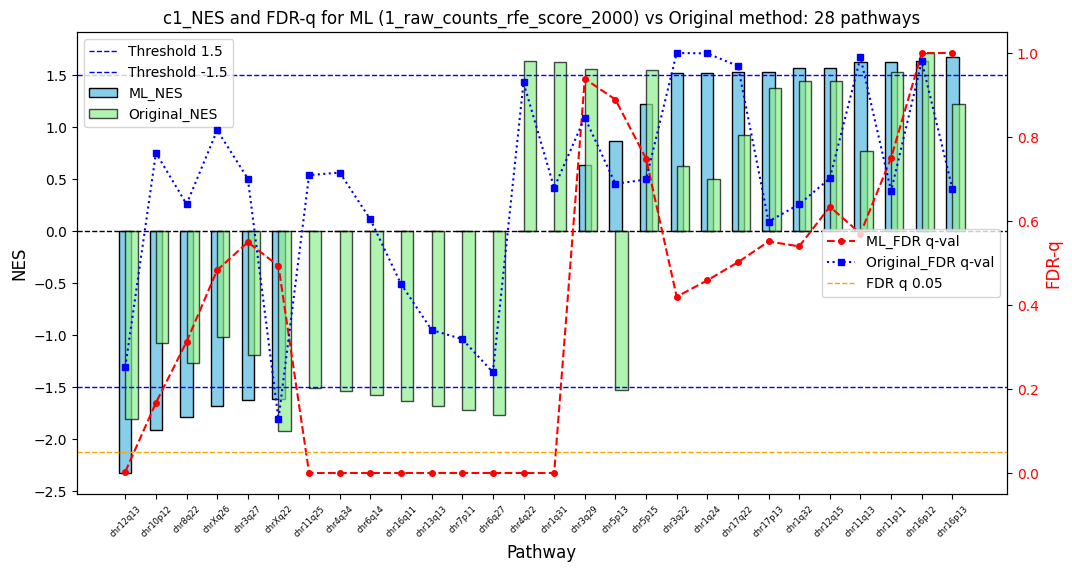

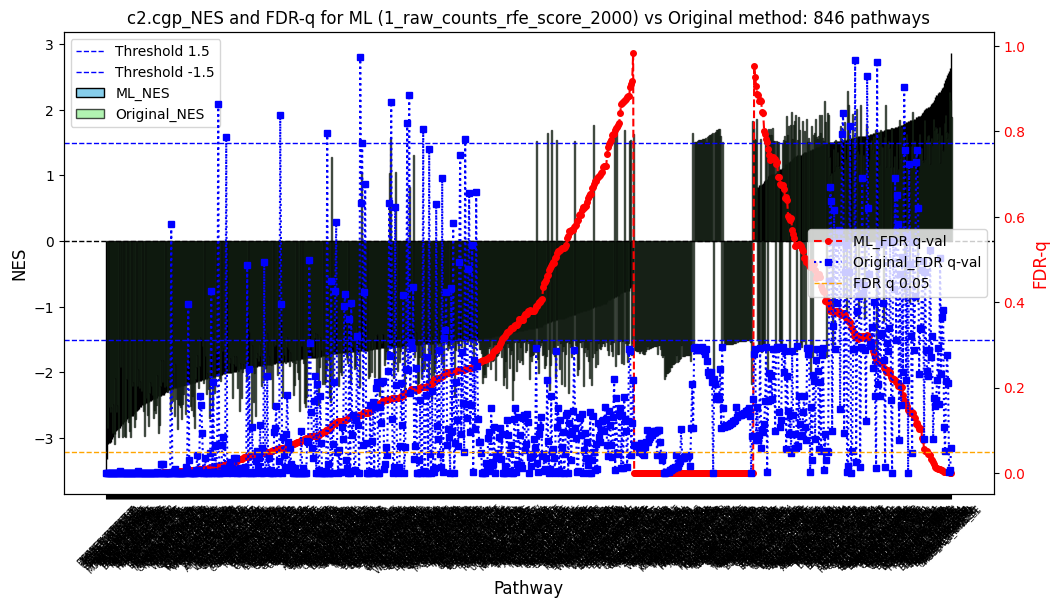

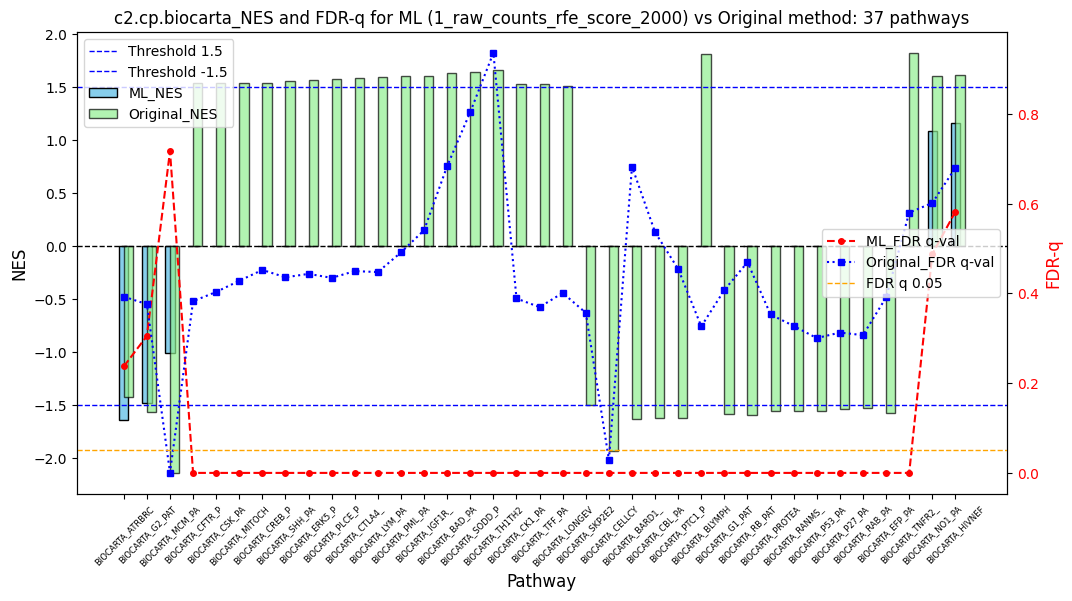

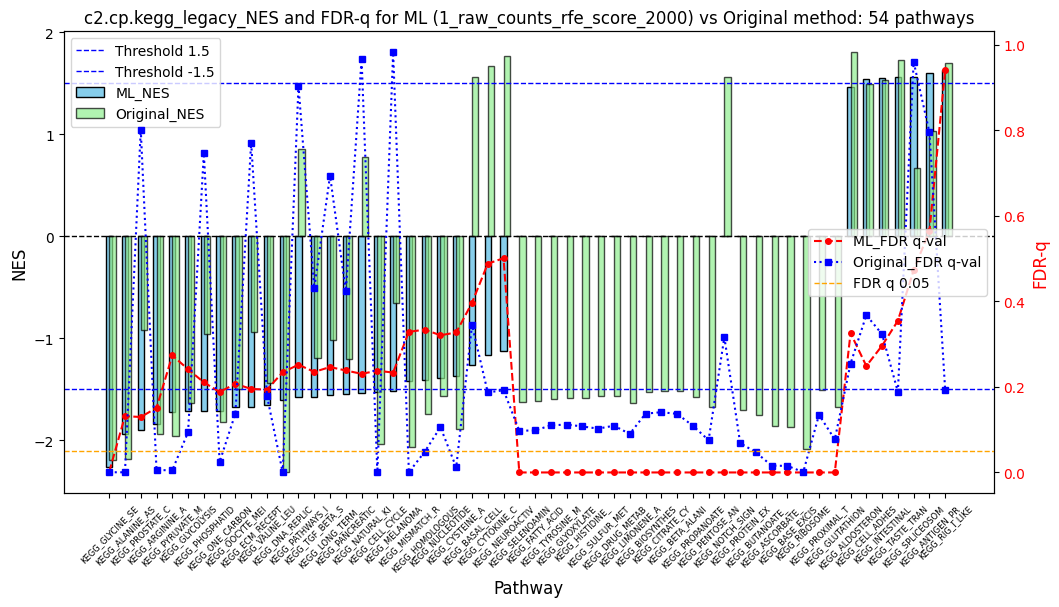

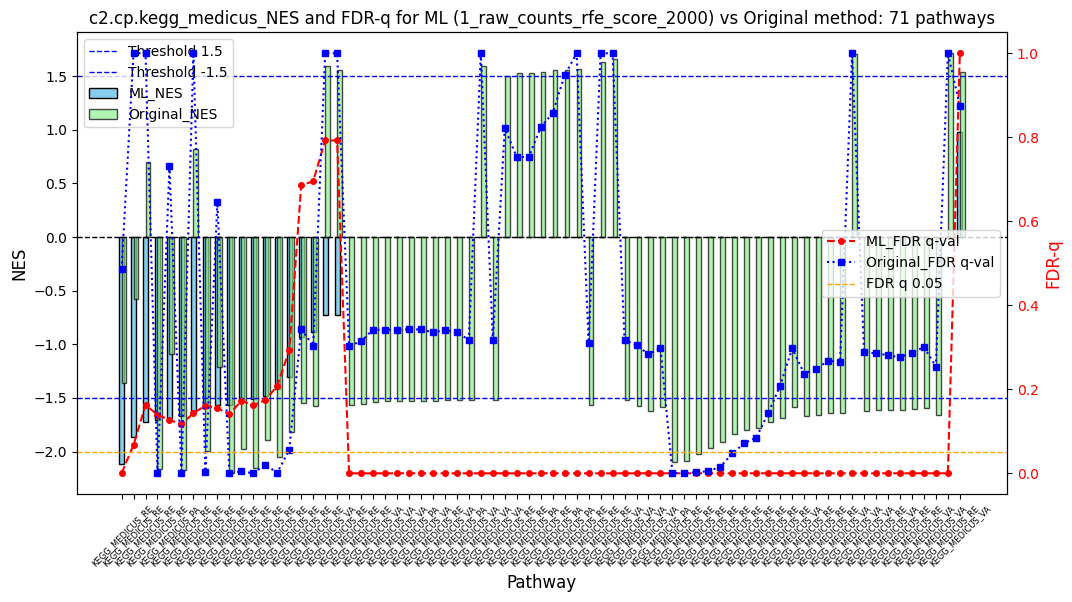

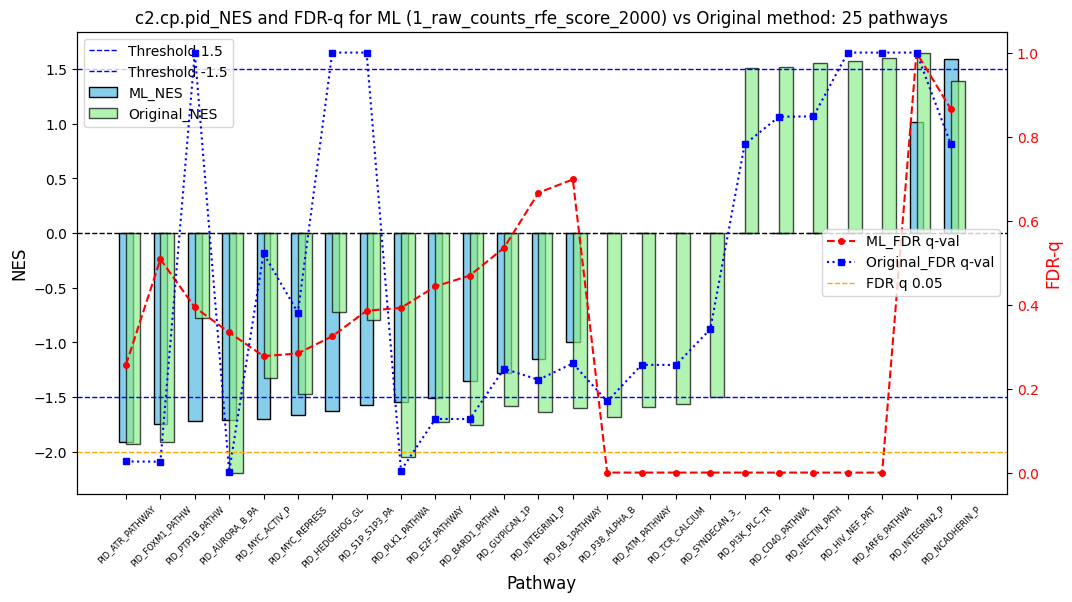

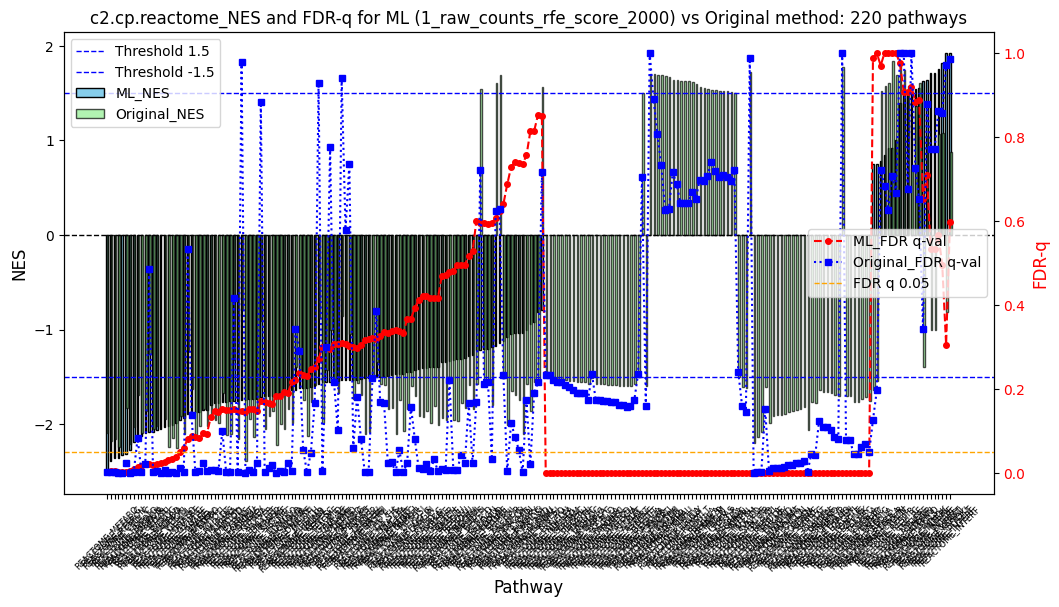

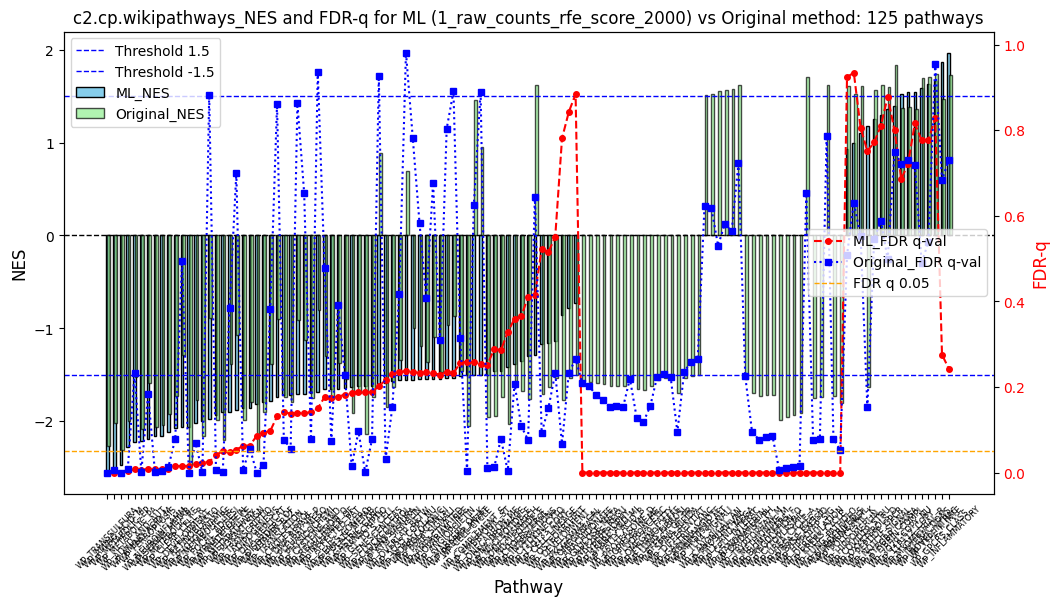

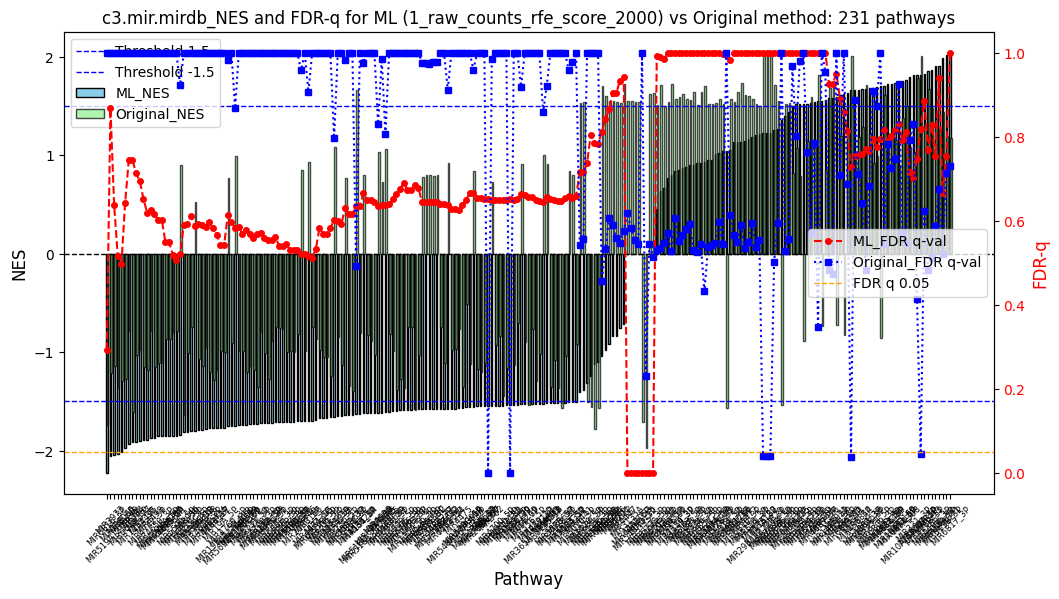

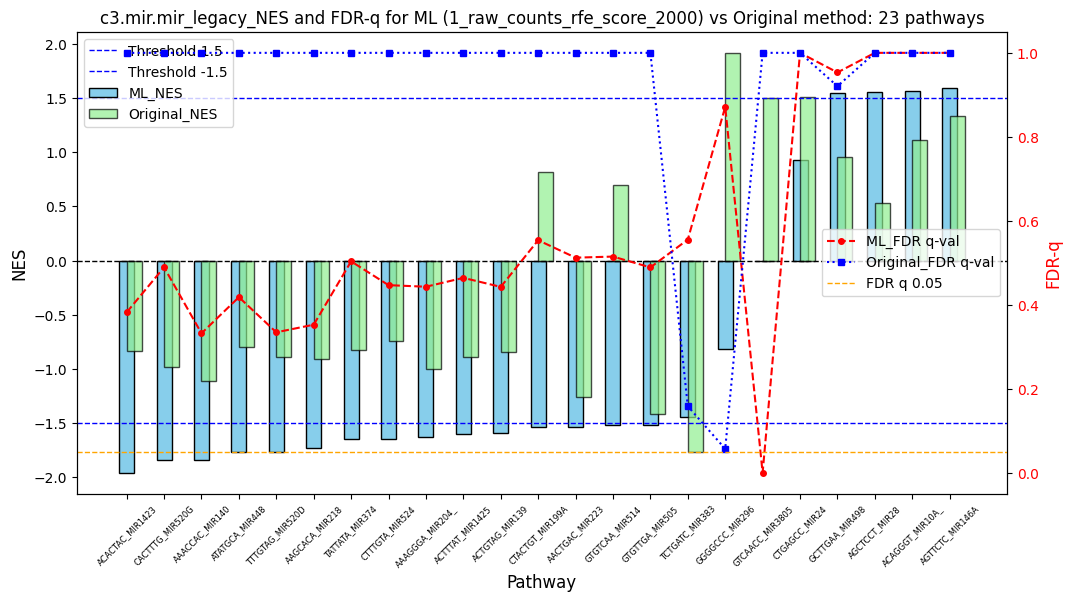

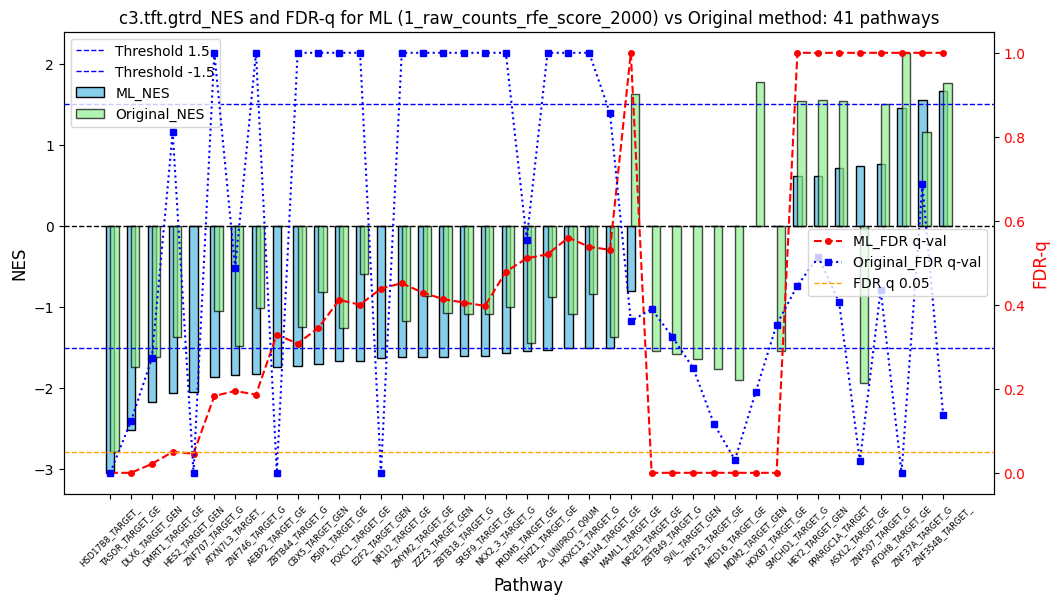

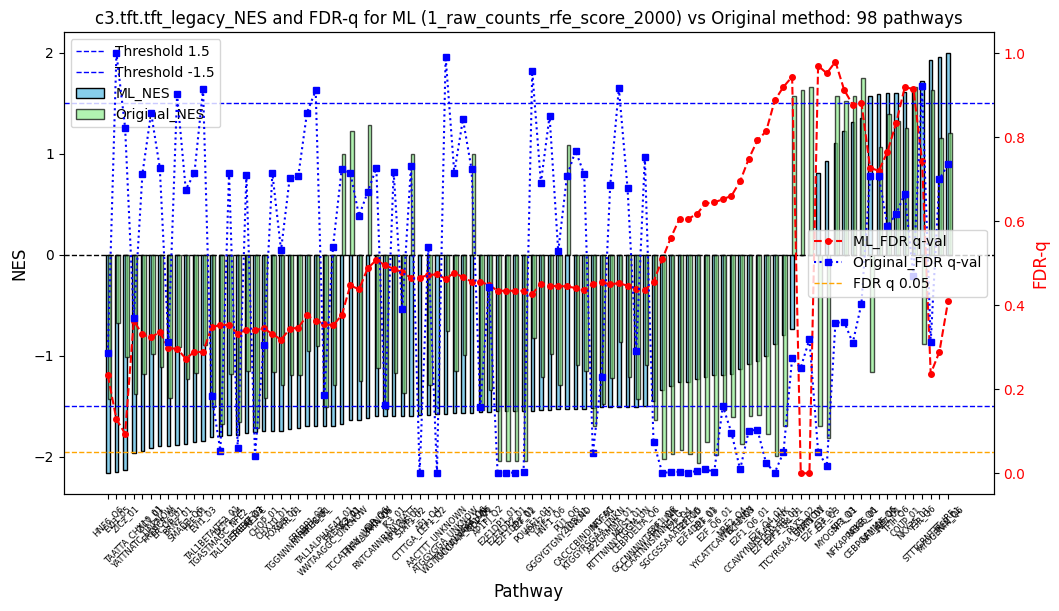

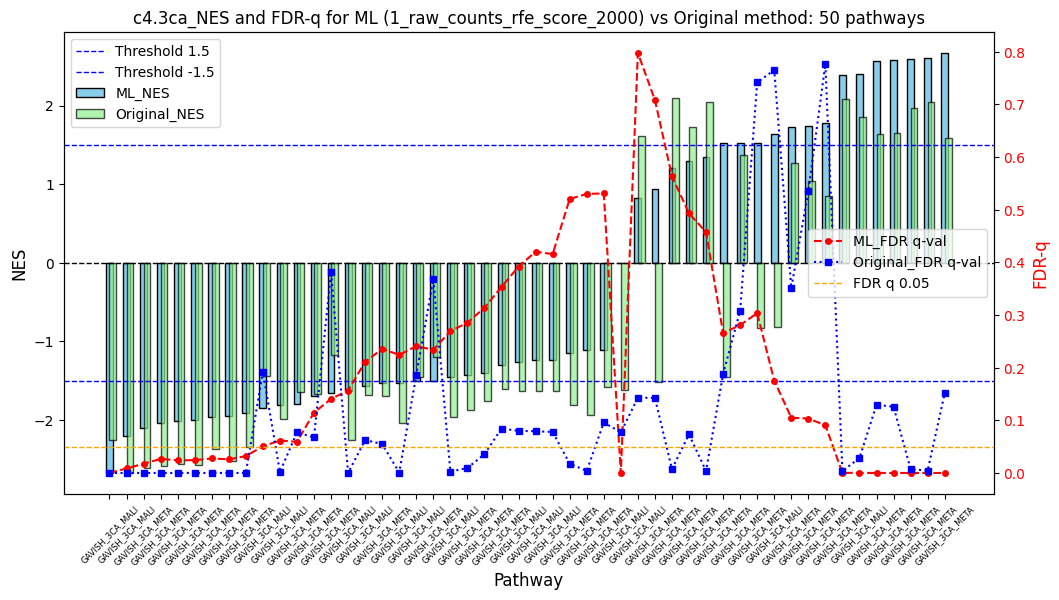

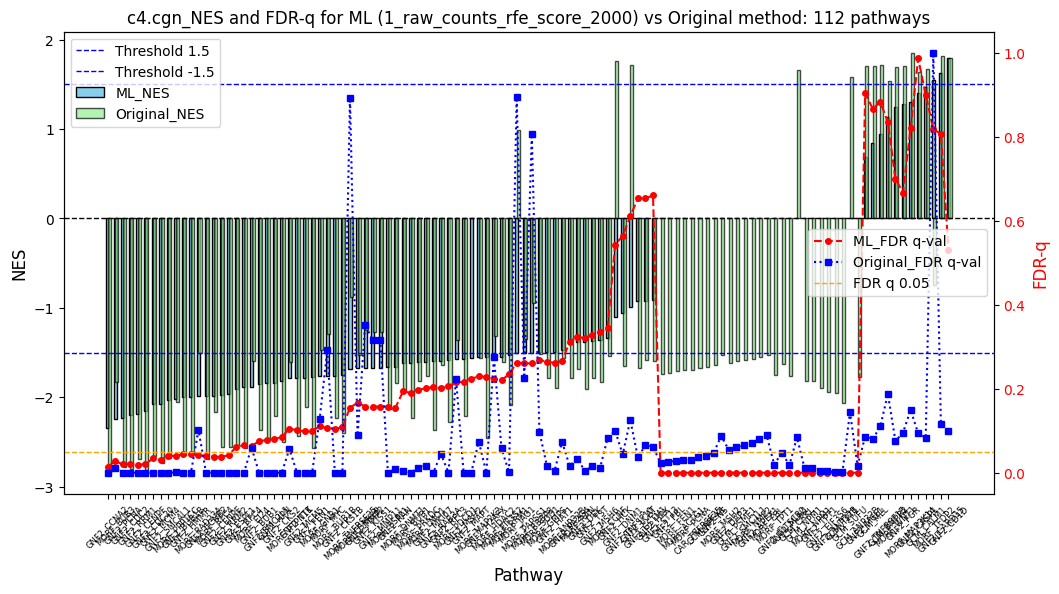

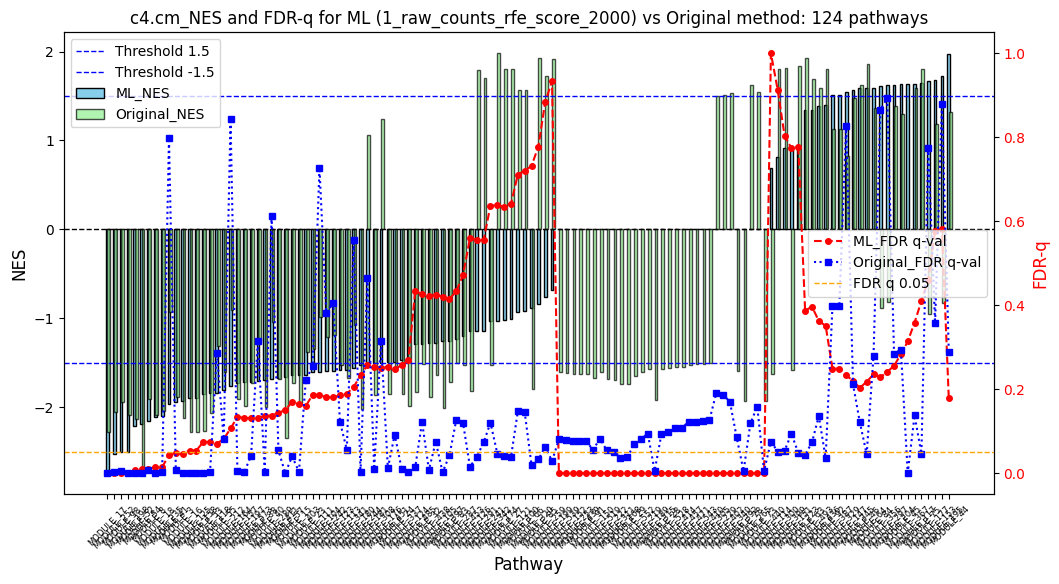

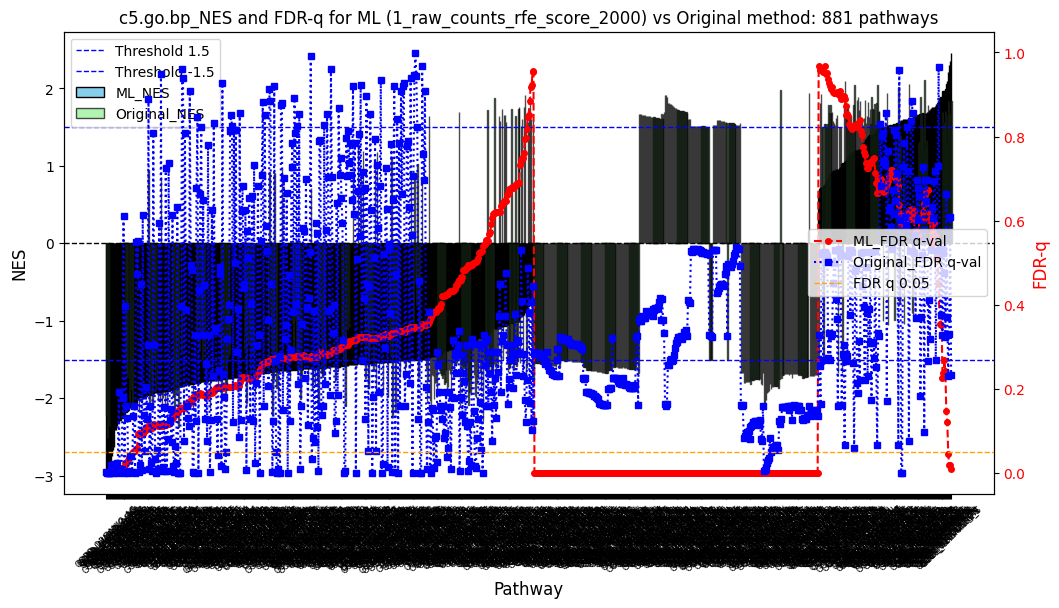

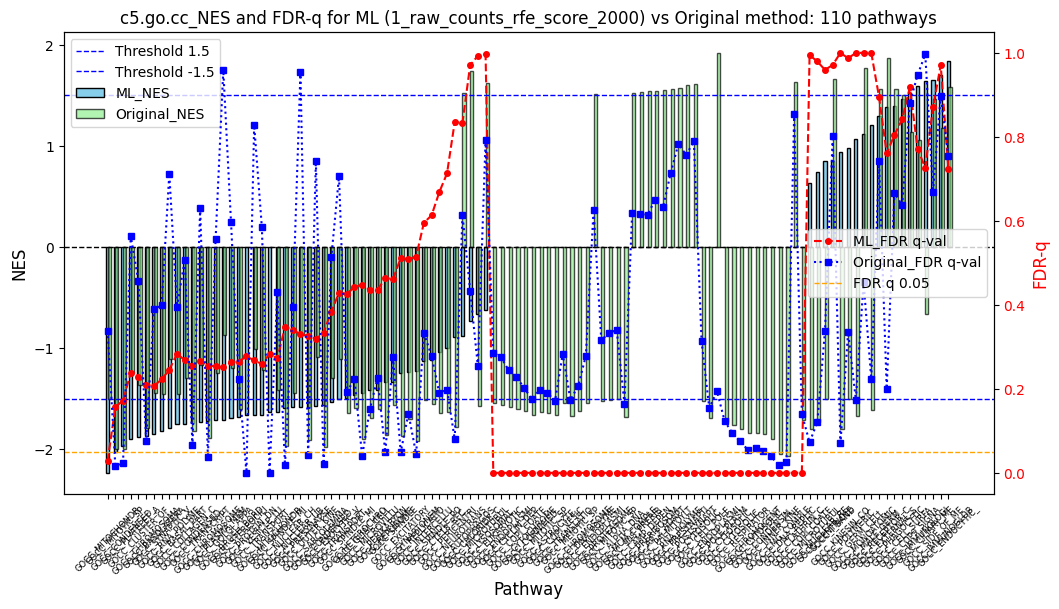

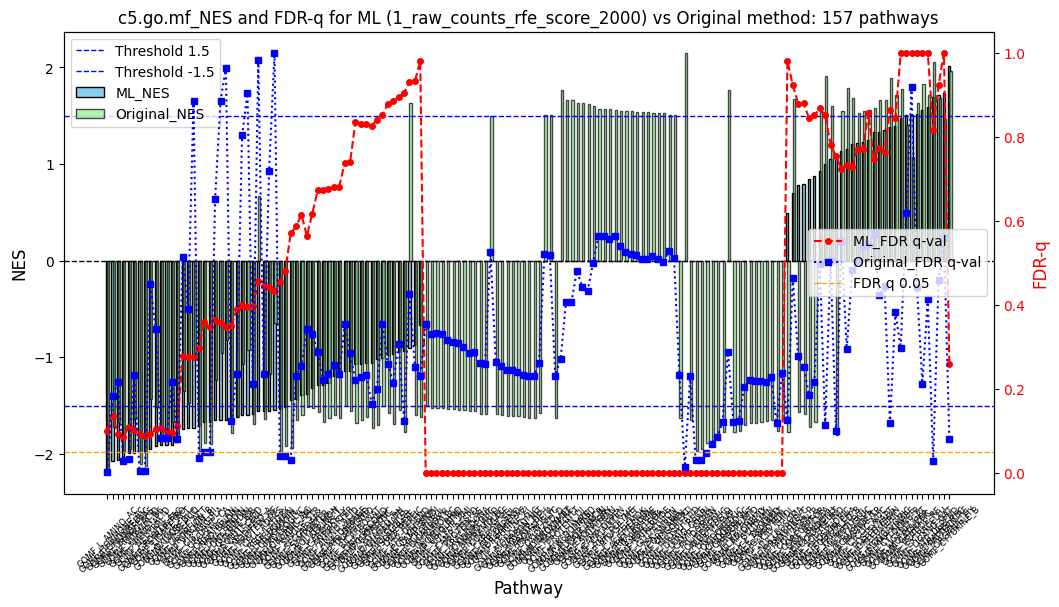

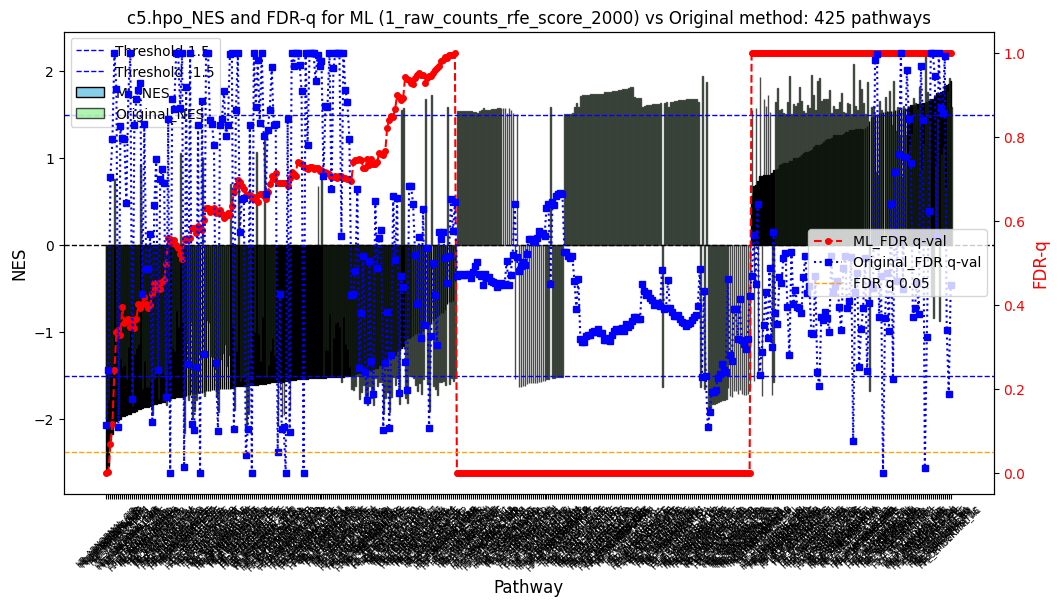

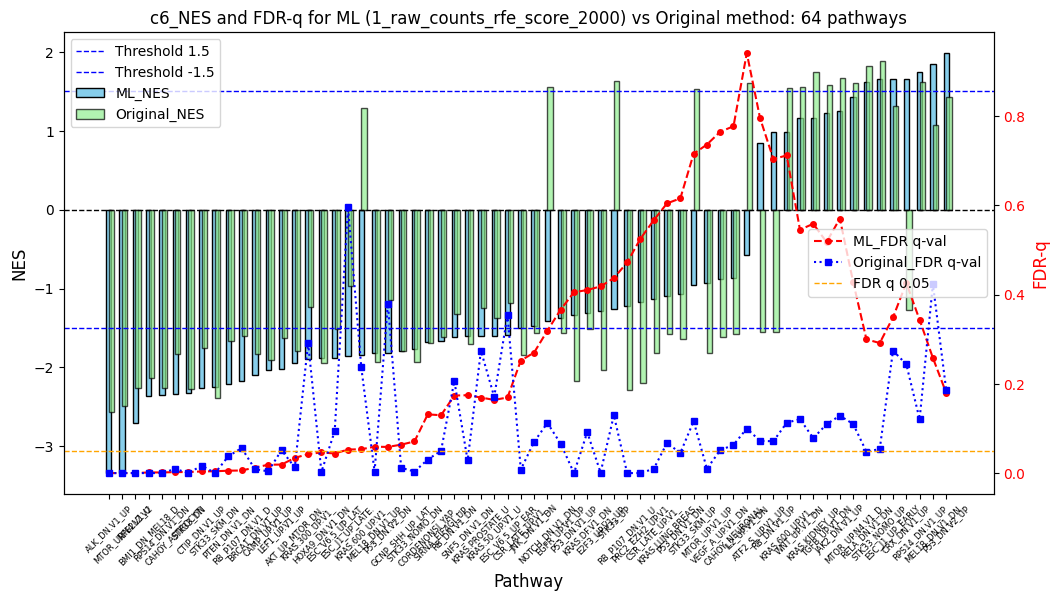

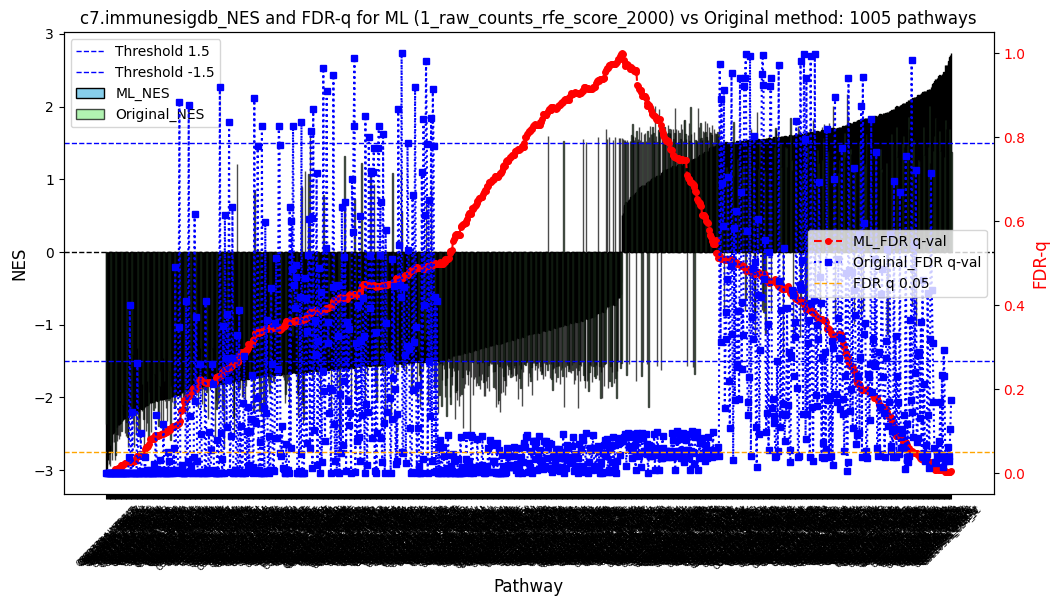

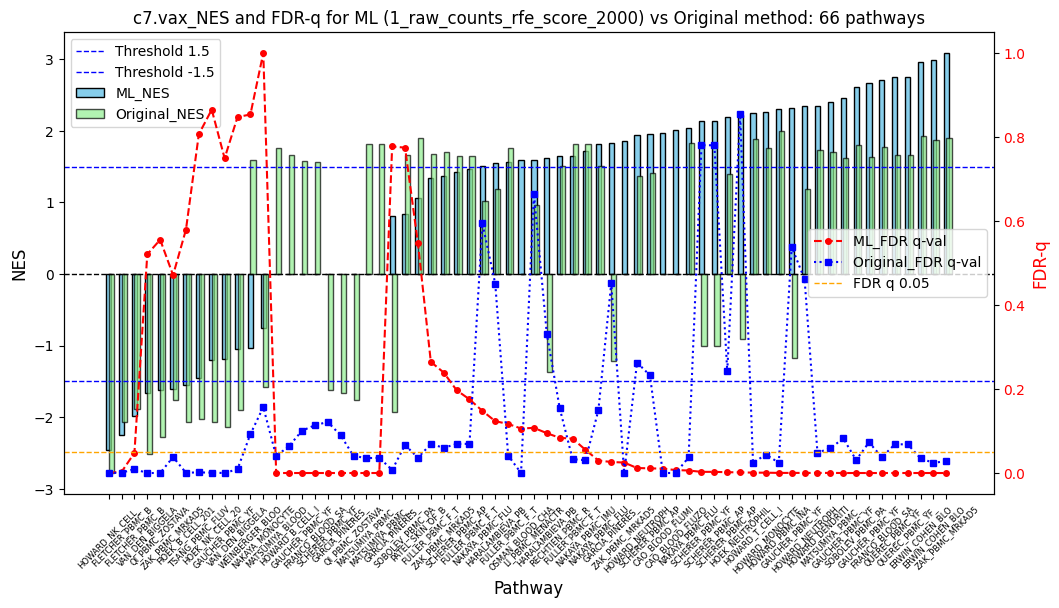

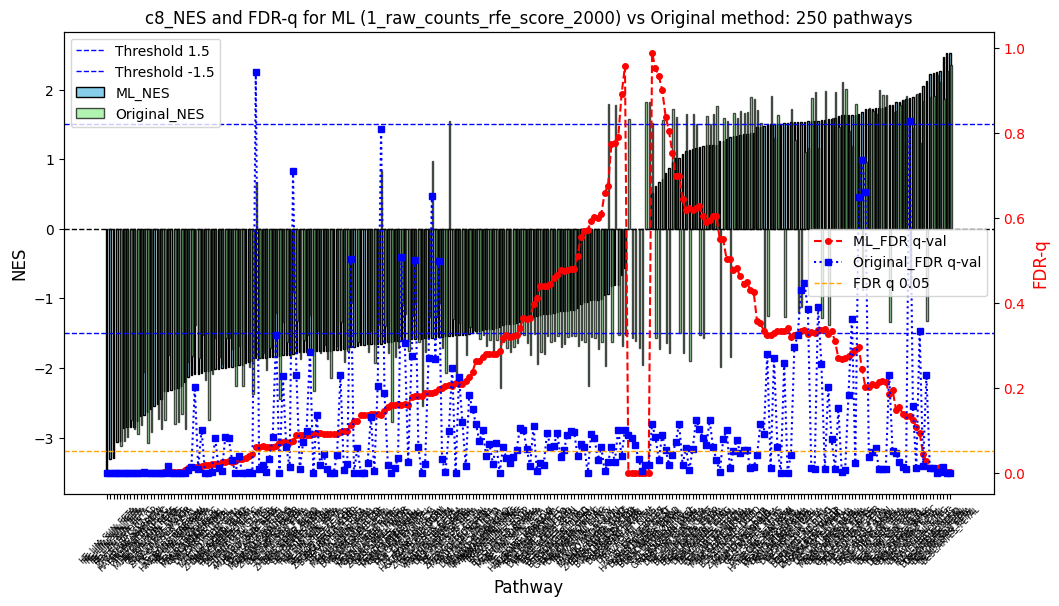

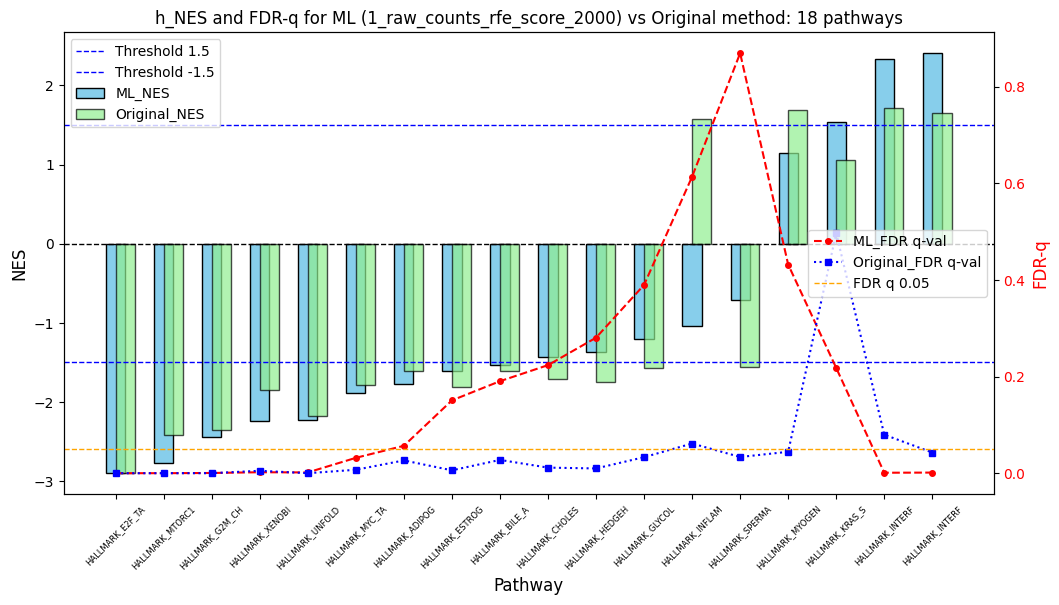

In [73]:
for gene_set in _all_results["collection"].unique():
    dff = df_all[df_all["collection"] == gene_set]
    _df_all = dff[['Term','ML_NES','ML_FDR q-val','Original_NES','Original_FDR q-val']]
    _df_all = _df_all.fillna(0)
    _df_all = _df_all.sort_values(by=["ML_NES"], ascending=True)

    # Create figure and axis
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
        # Add horizontal lines at y = 1.5 and y = -1.5
#     ax1.axhline(y=1.5, color='purple', linestyle='--', linewidth=1, label='y = 1.5')
#     ax1.axhline(y=-1.5, color='purple', linestyle='--', linewidth=1, label='y = -1.5')

    # Bar plot for NES
    bar_width = 0.4
    ax1.bar(_df_all['Term'], _df_all['ML_NES'], width=bar_width, label='ML_NES', color='skyblue', edgecolor='black')
    ax1.bar(_df_all['Term'], _df_all['Original_NES'], width=bar_width, label='Original_NES', color='lightgreen', edgecolor='black', alpha=0.7, align='edge')

    # Customize NES axis
#     ax1.set_ylabel("NES", color="black", fontsize=12)
#     ax1.set_xlabel("Term", fontsize=12)
#     ax1.tick_params(axis='y', labelcolor="black")
#     ax1.axhline(y=0, color='black', linewidth=1, linestyle='--')  # Reference line at NES=0
#     ax1.axhline(y=1.5, color='blue', linewidth=1, linestyle='--')  # Reference line at NES=1.5
#     ax1.axhline(y=-1.5, color='blue', linewidth=1, linestyle='--')  # Reference line at NES=-1.5
#     xx = range(len(_df_all['Term']))
#     ax1.set_xticks(xx)
#     ax1.set_xticklabels([term[:15] for term in _df_all['Term']], rotation=45, fontsize=6)
    
    
    # Customize NES axis
    ax1.set_ylabel("NES", color="black", fontsize=12)
    ax1.set_xlabel("Pathway", fontsize=12)
    ax1.tick_params(axis='y', labelcolor="black")
    ax1.axhline(y=0, color='black', linewidth=1, linestyle='--')  # Reference line at NES=0
    ax1.axhline(y=1.5, color='blue', linewidth=1, linestyle='--', label='Threshold 1.5')  # Reference line at NES=1.5
    ax1.axhline(y=-1.5, color='blue', linewidth=1, linestyle='--', label='Threshold -1.5')  # Reference line at NES=-1.5
    xx = range(len(_df_all['Term']))
    ax1.set_xticks(xx)
    ax1.set_xticklabels([term[:15] for term in _df_all['Term']], rotation=45, fontsize=6)


    # Create second y-axis for FDR-q
    ax2 = ax1.twinx()
    ax2.plot(_df_all['Term'], _df_all['ML_FDR q-val'], markersize=4, color='red', marker='o', linestyle='dashed', label='ML_FDR q-val')
    ax2.plot(_df_all['Term'], _df_all['Original_FDR q-val'], markersize=4, color='blue', marker='s', linestyle='dotted', label='Original_FDR q-val')

    # Customize FDR-q axis
    ax2.set_ylabel("FDR-q", color="red", fontsize=12)
    ax2.tick_params(axis='y', labelcolor="red")
    ax2.axhline(y=0.05, color='orange', linewidth=1, linestyle='--', label='FDR q 0.05')  # Reference line at FDR Q=0.05

    # Legend
    ax1.legend(loc="upper left")
    ax2.legend(loc="right")

    # Title
    plt.title(gene_set+ "_NES and FDR-q for ML (%s_2000) vs Original method: %s pathways"%(rank_file_rfe_union,len(dff)))

    # Save plot to P_df_all
#     pdf_all_filename = output_path + gene_set+"_ML_NES_FDRq_%s_bar_plot.pdf"%(rank_file_rfe_union)
#     plt.savefig(pdf_all_filename, format="pdf", bbox_inches="tight")
    
    jpg_gile = bar_jpg_path + gene_set+"_ML_NES_FDRq_%s_bar_plot.jpg"%(rank_file_rfe_union)
    plt.savefig(jpg_gile, format="jpg", bbox_inches="tight")
    

    # Show plot
    plt.show()
    plt.close()
#     break


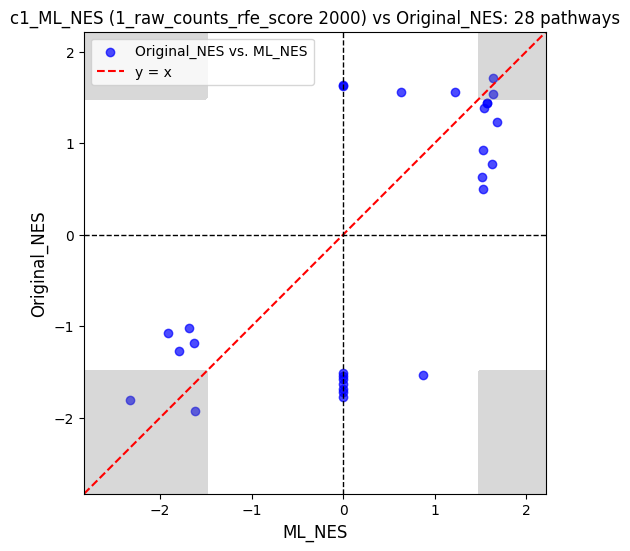

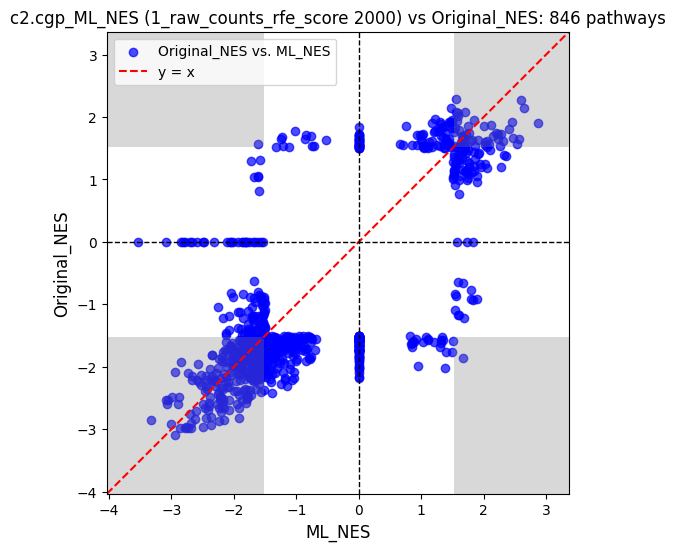

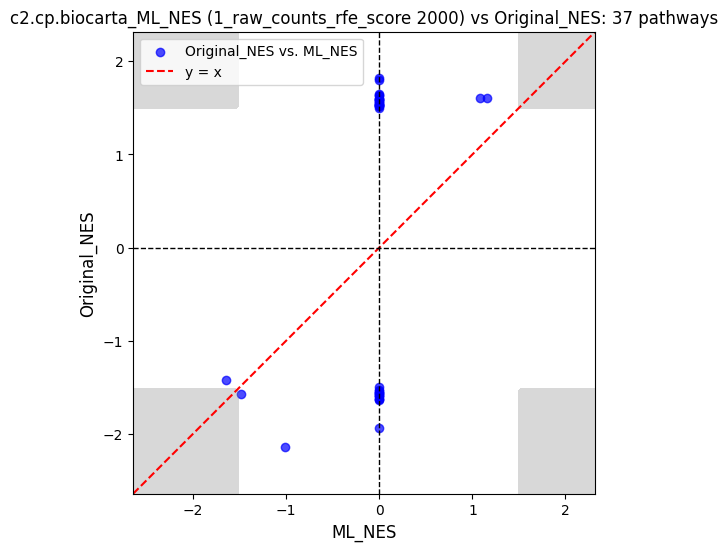

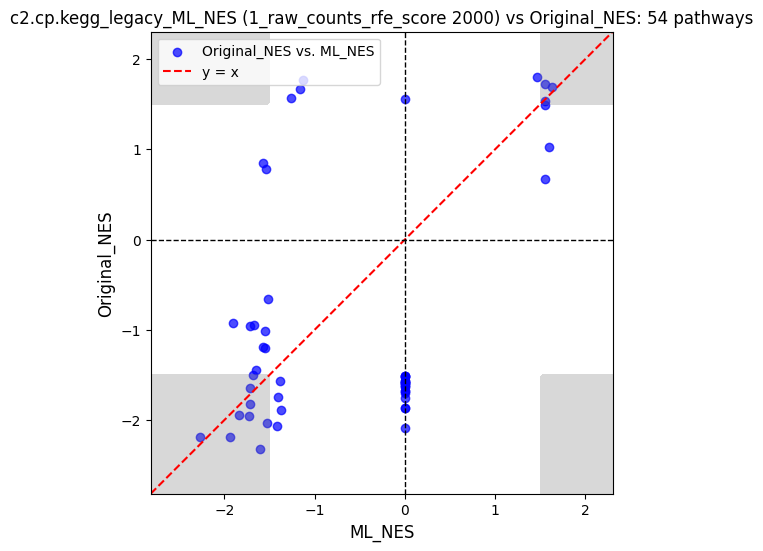

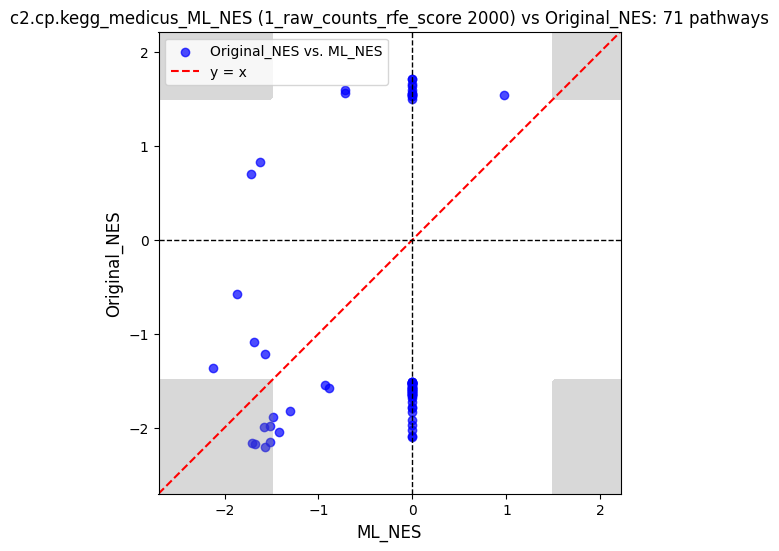

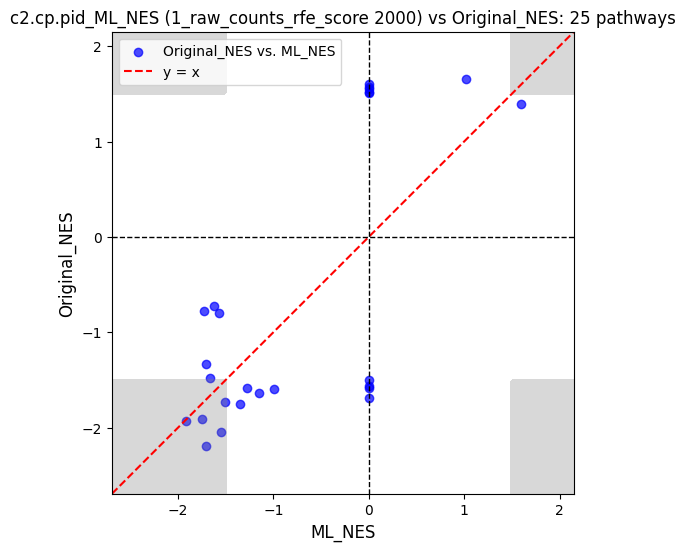

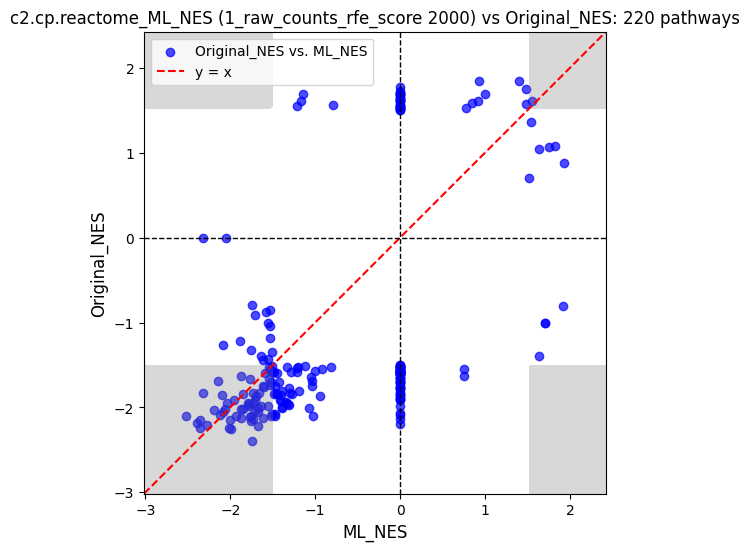

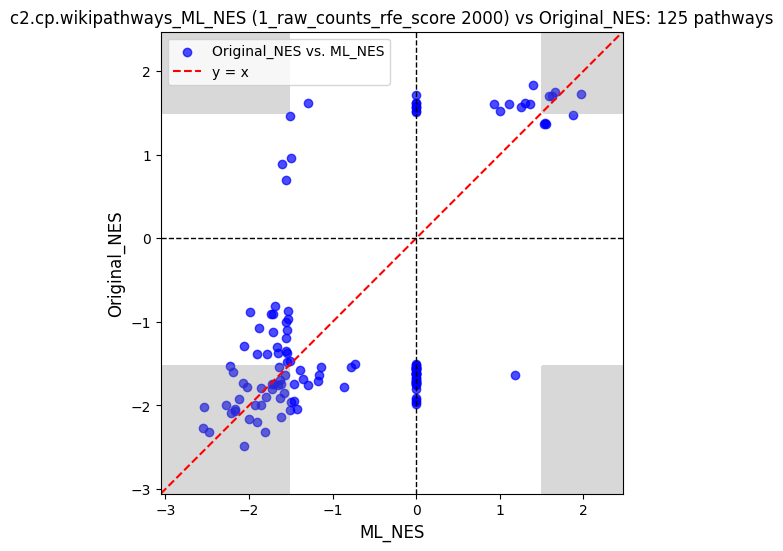

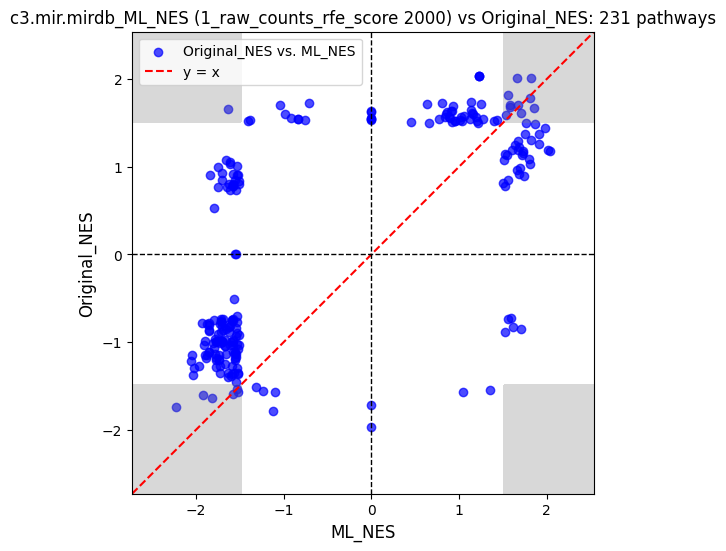

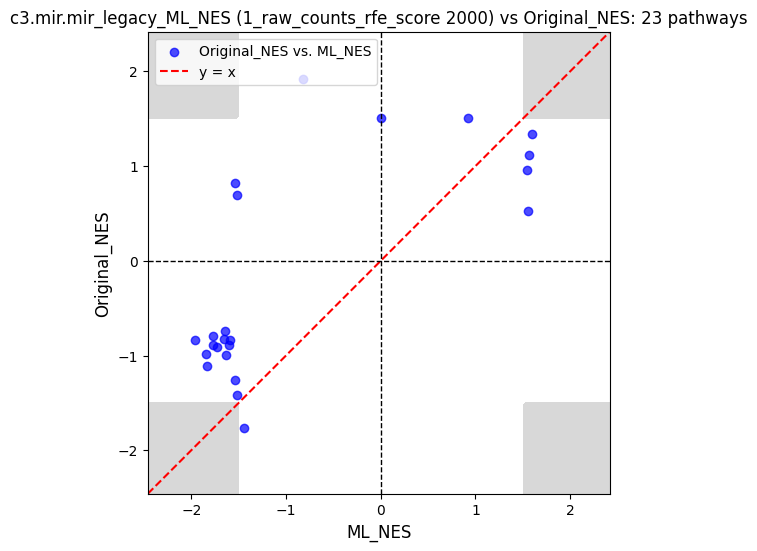

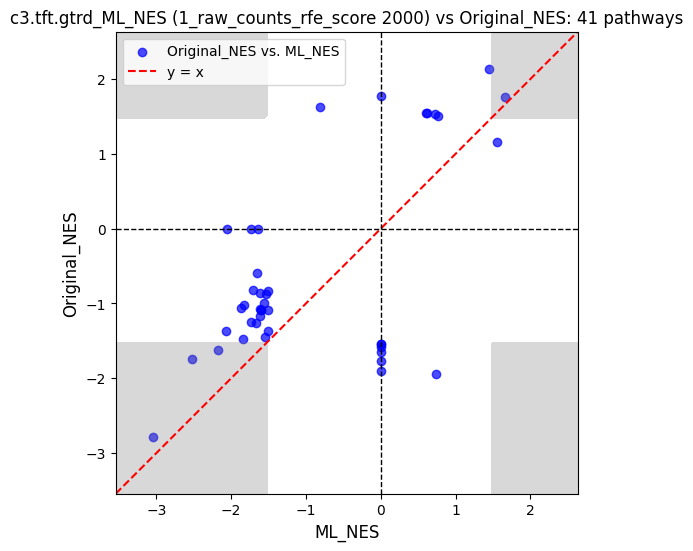

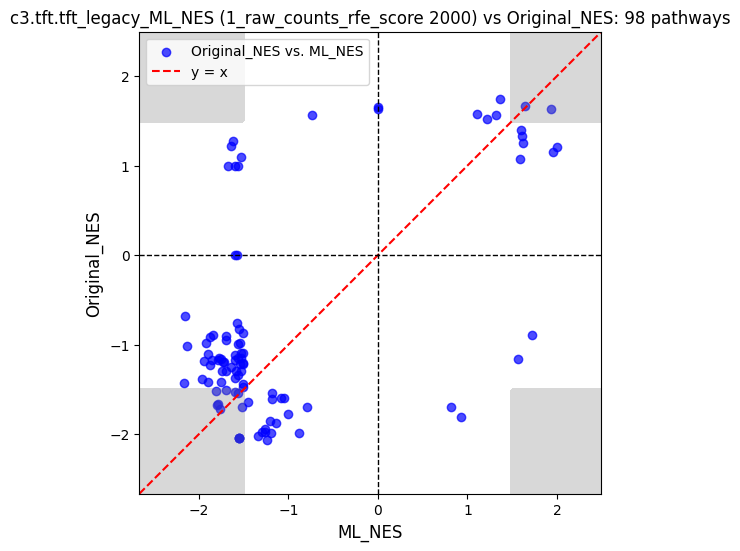

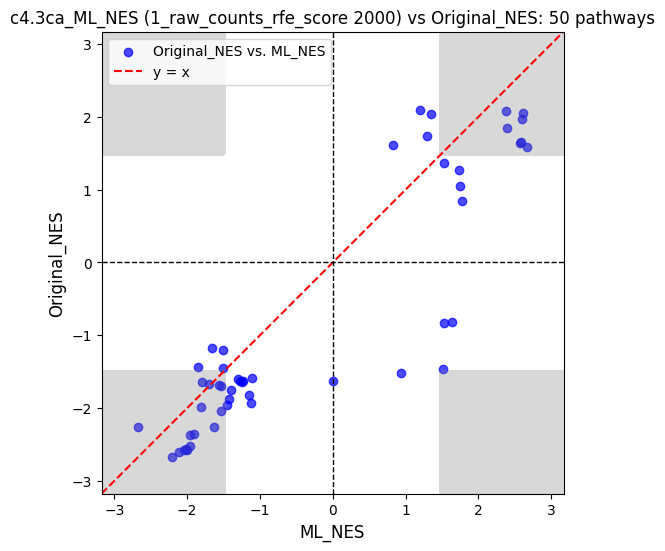

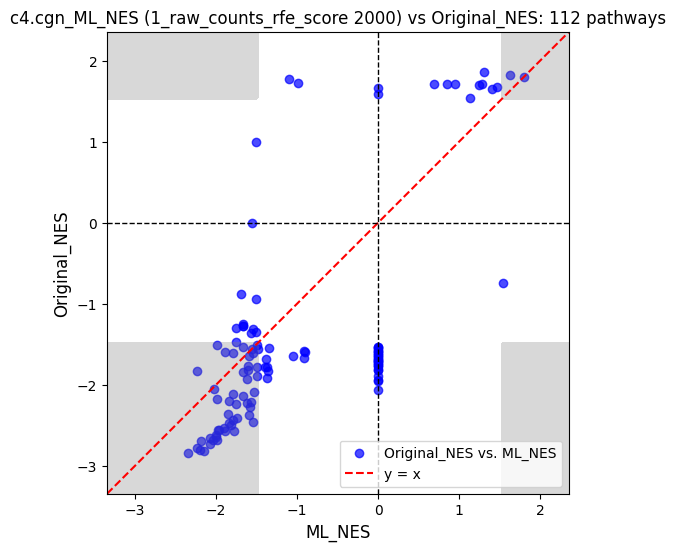

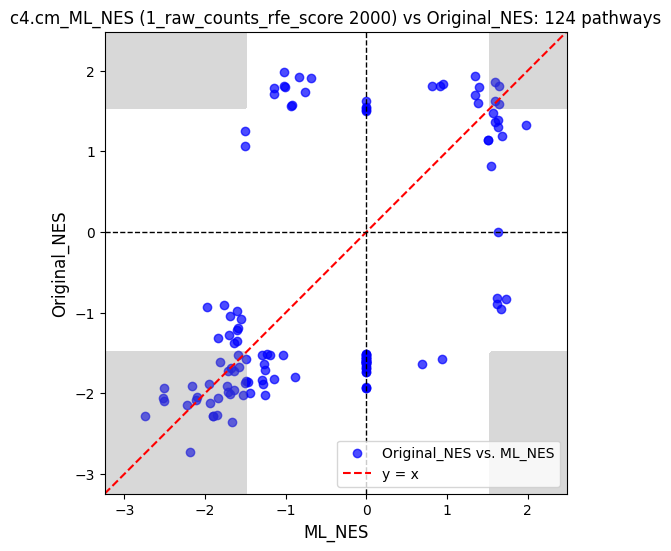

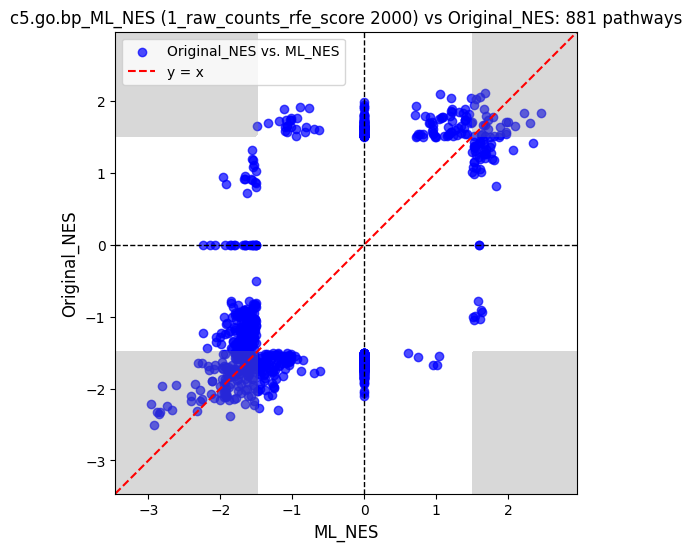

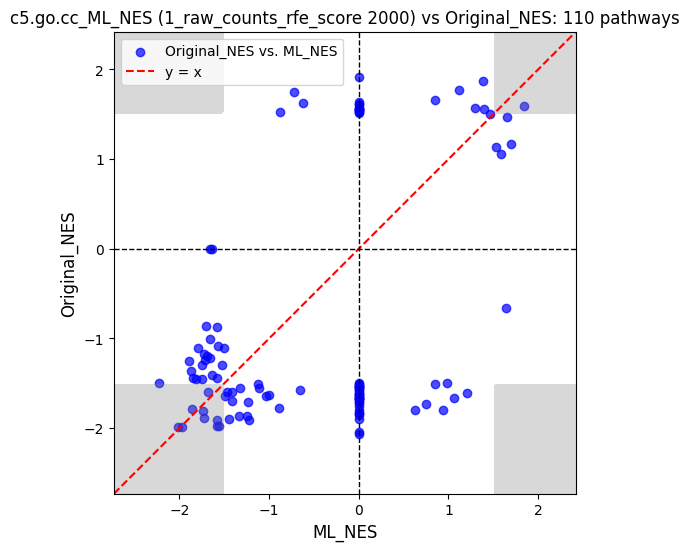

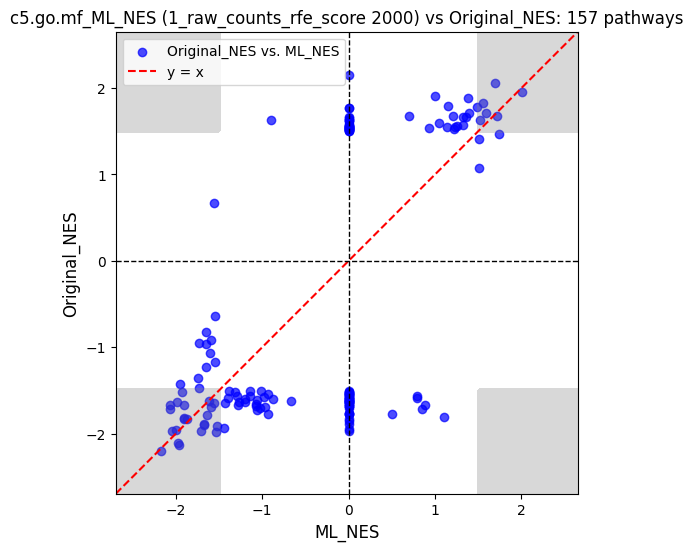

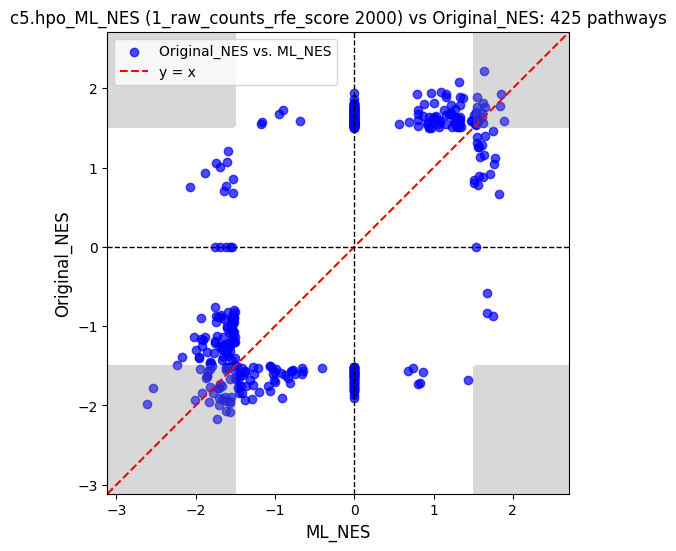

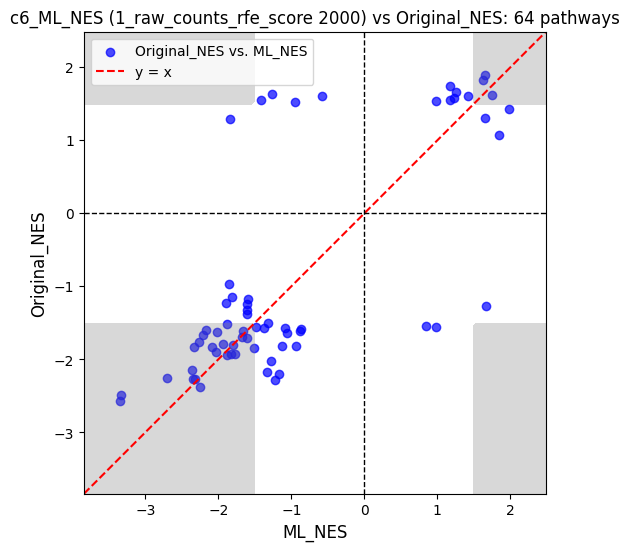

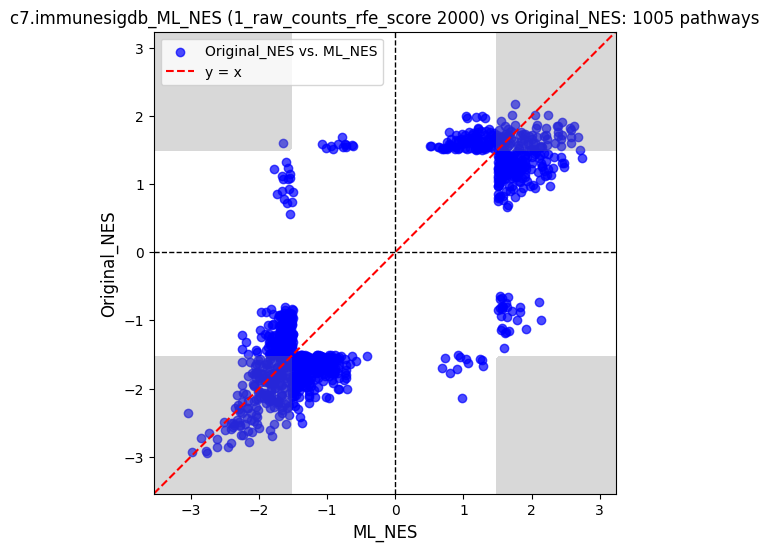

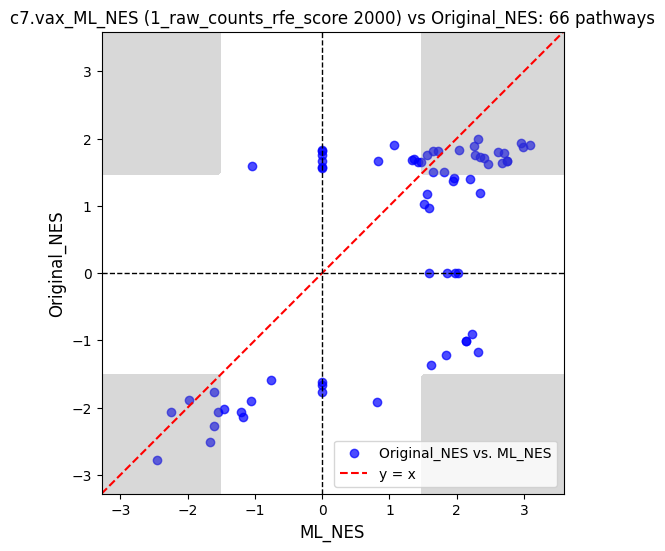

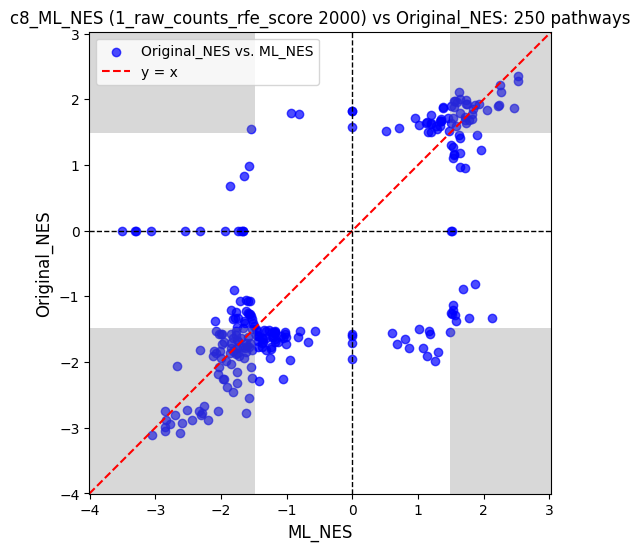

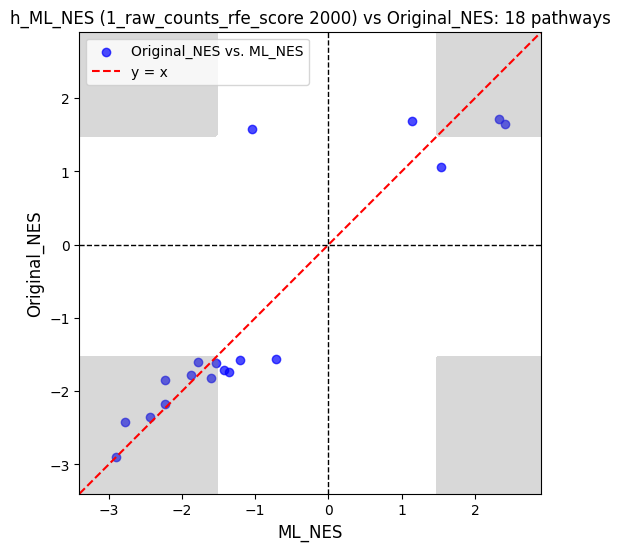

In [72]:
for gene_set in _all_results["collection"].unique():
    dff = df_all[df_all["collection"] == gene_set]
    _df_all = dff[['Term','ML_NES','ML_FDR q-val','Original_NES','Original_FDR q-val']]
    _df_all = _df_all.fillna(0)
    _df_all = _df_all.sort_values(by=["ML_NES"], ascending=True)

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))
    
        # Scatter plot for NES
    ax.scatter(_df_all['ML_NES'], _df_all['Original_NES'], label='Original_NES vs. ML_NES', color='blue', marker='o', alpha=0.7)

    # Add y = x reference line
    min_val = min(_df_all['ML_NES'].min(), _df_all['Original_NES'].min()) - 0.5
    max_val = max(_df_all['ML_NES'].max(), _df_all['Original_NES'].max()) + 0.5
    ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')
    
    # Equal aspect ratio for x and y axes
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    ax.set_aspect('equal', adjustable='box')

    
   # Shade only the region where |x| >= 1.5 and |y| >= 1.5 at the same time
    x_vals = np.linspace(min_val, max_val, 100)
    y_vals = np.linspace(min_val, max_val, 100)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Mask for the correct shaded region
    mask = (np.abs(X) >= 1.5) & (np.abs(Y) >= 1.5)
    ax.contourf(X, Y, mask, levels=[0.5, 1], colors='gray', alpha=0.3)



    # Customize axes
    ax.set_xlabel("ML_NES", fontsize=12)
    ax.set_ylabel("Original_NES", fontsize=12)
    ax.axhline(y=0, color='black', linewidth=1, linestyle='--')  # Reference line at y=0
    ax.axvline(x=0, color='black', linewidth=1, linestyle='--')  # Reference line at x=0

    # Title
    plt.title(gene_set+"_ML_NES (%s 2000) vs Original_NES: %s pathways"%(rank_file_rfe_union,len(dff)))

    # Legend
    ax.legend()

    # Save plot to PDF
#     pdf_filename = output_path + gene_set+"_ML_Original_NES_%s_scatter_plot.pdf"%(rank_file_rfe_union)
#     plt.savefig(pdf_filename, format="pdf", bbox_inches="tight")
    
    # To save with a specific quality (for JPG)
    jpg_file = scatter_jpg_path + gene_set+"_ML_Original_NES_%s_scatter_plot.jpg"%(rank_file_rfe_union)
    plt.savefig(jpg_file, dpi=300)
    
    # Show plot
    plt.show()
    plt.close()
#     break


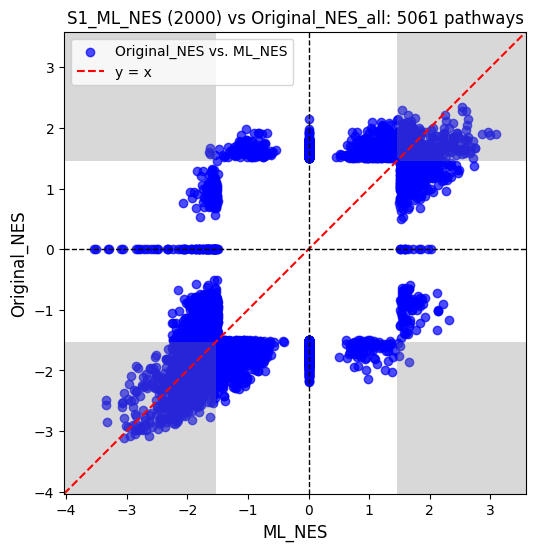

In [77]:
all_scatter_jpg_path = output_path+ "jpg/all_scatter_plot/"
os.makedirs(all_scatter_jpg_path, exist_ok=True)

dff = df_all.copy()
_df_all = dff[['Term','ML_NES','ML_FDR q-val','Original_NES','Original_FDR q-val']]
_df_all = _df_all.fillna(0)
_df_all = _df_all.sort_values(by=["ML_NES"], ascending=True)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

    # Scatter plot for NES
ax.scatter(_df_all['ML_NES'], _df_all['Original_NES'], label='Original_NES vs. ML_NES', color='blue', marker='o', alpha=0.7)

# Add y = x reference line
min_val = min(_df_all['ML_NES'].min(), _df_all['Original_NES'].min()) - 0.5
max_val = max(_df_all['ML_NES'].max(), _df_all['Original_NES'].max()) + 0.5
ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')

# Equal aspect ratio for x and y axes
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
ax.set_aspect('equal', adjustable='box')


# Shade only the region where |x| >= 1.5 and |y| >= 1.5 at the same time
x_vals = np.linspace(min_val, max_val, 100)
y_vals = np.linspace(min_val, max_val, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Mask for the correct shaded region
mask = (np.abs(X) >= 1.5) & (np.abs(Y) >= 1.5)
ax.contourf(X, Y, mask, levels=[0.5, 1], colors='gray', alpha=0.3)



# Customize axes
ax.set_xlabel("ML_NES", fontsize=12)
ax.set_ylabel("Original_NES", fontsize=12)
ax.axhline(y=0, color='black', linewidth=1, linestyle='--')  # Reference line at y=0
ax.axvline(x=0, color='black', linewidth=1, linestyle='--')  # Reference line at x=0

# Title
plt.title("S1_ML_NES (2000) vs Original_NES_all: %s pathways"%(len(dff)))

# Legend
ax.legend()

# Save plot to PDF
#     pdf_filename = output_path + gene_set+"_ML_Original_NES_%s_scatter_plot.pdf"%(rank_file_rfe_union)
#     plt.savefig(pdf_filename, format="pdf", bbox_inches="tight")

# To save with a specific quality (for JPG)
jpg_file = all_scatter_jpg_path + "S1_ML_Original_NES_scatter_plot_all.pdf"
plt.savefig(jpg_file, format="pdf", bbox_inches="tight")

# Show plot
plt.show()
plt.close()



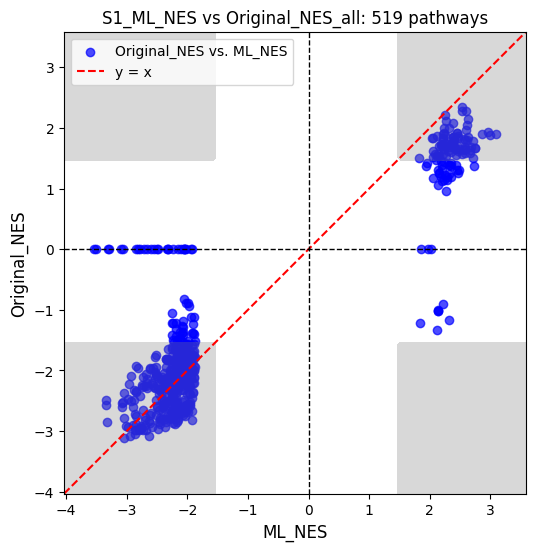

In [81]:
dfff = df_all.copy()

dfff["only_ML"] = dfff.apply(lambda row:only_rfe(row),axis=1)
dfff["by_ML"] = dfff.apply(lambda row:by_rfe(row),axis=1)
dfff["only_Original"] = dfff.apply(lambda row:only_original(row),axis=1)
dfff["by_Original"] = dfff.apply(lambda row:by_original(row),axis=1)
dfff["by_two"] = dfff.apply(lambda row:by_two(row),axis=1)
dfff["improved_by_ML"] = dfff.apply(lambda row:imporve_by_rfe(row),axis=1)
_dfff = dfff[dfff["by_ML"]==1].reset_index(drop=True)

dff = _dfff.copy()
_df_all = dff[['Term','ML_NES','ML_FDR q-val','Original_NES','Original_FDR q-val']]
_df_all = _df_all.fillna(0)
_df_all = _df_all.sort_values(by=["ML_NES"], ascending=True)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

    # Scatter plot for NES
ax.scatter(_df_all['ML_NES'], _df_all['Original_NES'], label='Original_NES vs. ML_NES', color='blue', marker='o', alpha=0.7)

# Add y = x reference line
min_val = min(_df_all['ML_NES'].min(), _df_all['Original_NES'].min()) - 0.5
max_val = max(_df_all['ML_NES'].max(), _df_all['Original_NES'].max()) + 0.5
ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')

# Equal aspect ratio for x and y axes
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
ax.set_aspect('equal', adjustable='box')


# Shade only the region where |x| >= 1.5 and |y| >= 1.5 at the same time
x_vals = np.linspace(min_val, max_val, 100)
y_vals = np.linspace(min_val, max_val, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Mask for the correct shaded region
mask = (np.abs(X) >= 1.5) & (np.abs(Y) >= 1.5)
ax.contourf(X, Y, mask, levels=[0.5, 1], colors='gray', alpha=0.3)



# Customize axes
ax.set_xlabel("ML_NES", fontsize=12)
ax.set_ylabel("Original_NES", fontsize=12)
ax.axhline(y=0, color='black', linewidth=1, linestyle='--')  # Reference line at y=0
ax.axvline(x=0, color='black', linewidth=1, linestyle='--')  # Reference line at x=0

# Title
plt.title("S1_ML_NES vs Original_NES_all: %s pathways"%(len(dff)))

# Legend
ax.legend()

# Save plot to PDF
#     pdf_filename = output_path + gene_set+"_ML_Original_NES_%s_scatter_plot.pdf"%(rank_file_rfe_union)
#     plt.savefig(pdf_filename, format="pdf", bbox_inches="tight")

# To save with a specific quality (for JPG)
jpg_file = all_scatter_jpg_path + "S1_ML_Original_NES_scatter_plot_by_ML.pdf"
plt.savefig(jpg_file, format="pdf", bbox_inches="tight")


# Show plot
plt.show()
plt.close()



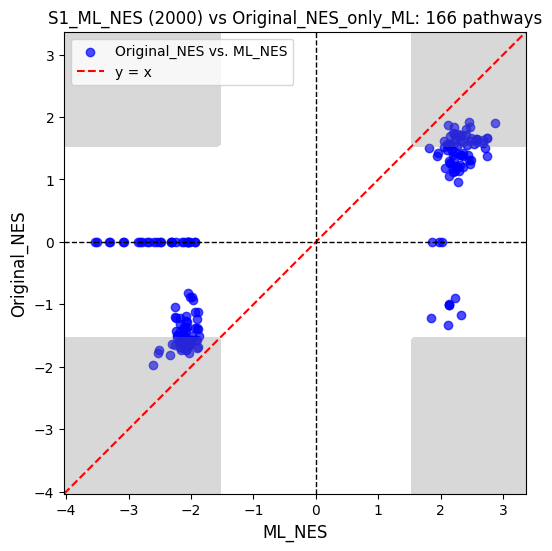

In [83]:
_dfff = dfff[dfff["only_ML"]==1].reset_index(drop=True)

dff = _dfff.copy()
_df_all = dff[['Term','ML_NES','ML_FDR q-val','Original_NES','Original_FDR q-val']]
_df_all = _df_all.fillna(0)
_df_all = _df_all.sort_values(by=["ML_NES"], ascending=True)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

    # Scatter plot for NES
ax.scatter(_df_all['ML_NES'], _df_all['Original_NES'], label='Original_NES vs. ML_NES', color='blue', marker='o', alpha=0.7)

# Add y = x reference line
min_val = min(_df_all['ML_NES'].min(), _df_all['Original_NES'].min()) - 0.5
max_val = max(_df_all['ML_NES'].max(), _df_all['Original_NES'].max()) + 0.5
ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')

# Equal aspect ratio for x and y axes
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
ax.set_aspect('equal', adjustable='box')


# Shade only the region where |x| >= 1.5 and |y| >= 1.5 at the same time
x_vals = np.linspace(min_val, max_val, 100)
y_vals = np.linspace(min_val, max_val, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Mask for the correct shaded region
mask = (np.abs(X) >= 1.5) & (np.abs(Y) >= 1.5)
ax.contourf(X, Y, mask, levels=[0.5, 1], colors='gray', alpha=0.3)



# Customize axes
ax.set_xlabel("ML_NES", fontsize=12)
ax.set_ylabel("Original_NES", fontsize=12)
ax.axhline(y=0, color='black', linewidth=1, linestyle='--')  # Reference line at y=0
ax.axvline(x=0, color='black', linewidth=1, linestyle='--')  # Reference line at x=0

# Title
plt.title("S1_ML_NES (2000) vs Original_NES_only_ML: %s pathways"%(len(dff)))

# Legend
ax.legend()

# Save plot to PDF
#     pdf_filename = output_path + gene_set+"_ML_Original_NES_%s_scatter_plot.pdf"%(rank_file_rfe_union)
#     plt.savefig(pdf_filename, format="pdf", bbox_inches="tight")

# To save with a specific quality (for JPG)
jpg_file = all_scatter_jpg_path + "S1_ML_Original_NES_scatter_plot_only_ML.pdf"
plt.savefig(jpg_file, format="pdf", bbox_inches="tight")


# Show plot
plt.show()
plt.close()

In [ ]:
# # Create second y-axis for FDR-q
# ax2 = ax1.twinx()
# ax2.plot(df_all['Term'], df_all['3019gene_FDR q-val'], color='red', marker='o', linestyle='dashed', label='3019gene_FDR q-val')
# ax2.plot(df_all['Term'], df_all['original_FDR q-val'], color='orange', marker='s', linestyle='dotted', label='original_FDR q-val')

# # Customize FDR-q axis
# ax2.set_ylabel("FDR-q", color="red", fontsize=12)
# ax2.tick_params(axis='y', labelcolor="red")

# # Legend
# ax1.legend(loc="upper left")
# ax2.legend(loc="upper right")

# # Title
# plt.title("NES and FDR-q for GENE_A and GENE_B")

# # Save plot to Pdf_all
# pdf_all_filename = output_path + "/NES_FDRq_plot.pdf"
# plt.savefig(pdf_all_filename, format="pdf", bbox_inches="tight")

# # Show plot
# plt.show()


In [ ]:
# sns.scatterplot(x=df_all['3019gene_NES'], y=df_all['original_NES'], hue=df_all['Group'], palette=colors, s=10, legend='full')

# # Labels and title
# plt.xlabel('3019gene_NES')
# plt.ylabel('original_NES')
# plt.title('Scatter Plot of 3019gene_NES vs original_NES')

In [ ]:
# dff_all = all_results.copy()

In [ ]:
# dff_all['Group'] = dff_all['3019gene_NES'].apply(lambda x: 'Group 1' if x >= 0 else 'Group 2')
# # Set colors for the two groups
# colors = {'Group 1': 'blue', 'Group 2': 'red'}

# sns.scatterplot(x=dff_all['3019gene_NES'], y=dff_all['original_NES'], hue=dff_all['Group'], palette=colors, s=10, legend='full')

# # Labels and title
# plt.xlabel('3019gene_NES')
# plt.ylabel('original_NES')
# plt.title('Scatter Plot of 3019gene_NES vs original_NES')

In [ ]:
# all_results.to_csv(output_path + "3019_genes.csv")

In [ ]:
# _all_results["collection"].value_counts()

In [ ]:
df_all.columns

In [ ]:
_all_results.columns

In [41]:
######################

##  at least highlighted by one method

#####################

_dff = df_all[((df_all["ML_NES"].abs()>=1.5) & (df_all["ML_FDR q-val"] <= 0.05)) | ( (df_all["Original_NES"].abs()>=1.5) & (df_all["Original_FDR q-val"]<=0.05))].reset_index(drop=True)
_dff

Term  ML_Name     ML_ES    ML_NES  \
0                                   chr12q13  prerank -0.556973 -2.328845   
1                      FISCHER_DREAM_TARGETS  prerank -0.534501 -3.532975   
2        ZHAN_MULTIPLE_MYELOMA_CD1_VS_CD2_UP  prerank -0.745130 -3.321876   
3     KINSEY_TARGETS_OF_EWSR1_FLII_FUSION_UP  prerank -0.454079 -3.088755   
4               ZHAN_MULTIPLE_MYELOMA_CD1_UP  prerank -0.837713 -3.083379   
...                                      ...      ...       ...       ...   
1530                     HALLMARK_GLYCOLYSIS  prerank -0.274423 -1.201216   
1531                HALLMARK_SPERMATOGENESIS  prerank -0.179061 -0.715666   
1532                     HALLMARK_MYOGENESIS  prerank  0.240314  1.147421   
1533      HALLMARK_INTERFERON_ALPHA_RESPONSE  prerank  0.529057  2.331474   
1534      HALLMARK_INTERFERON_GAMMA_RESPONSE  prerank  0.459555  2.408154   

      ML_NOM p-val  ML_FDR q-val  ML_FWER p-val ML_Tag % ML_Gene %  \
0         0.000000      0.003040          0.003     8/24     5.90%   
1         0.000000      0.000000          0.000  127/134    44.95%   
2         0.000000      0.000000          0.000    21/30    12.65%   
3         0.000000      0.000000          0.000  144/164    44.95%   
4         0.000000      0.000000          0.000    15/17    13.20%   
...            ...           ...            ...      ...       ...   
1530      0.226481      0.389600          0.992     9/30    13.80%   
1531      0.781193      0.869035          1.000    13/21    42.05%   
1532      0.296460      0.431669          0.985    11/31    20.85%   
1533      0.002193      0.000946          0.003    10/23    12.85%   
1534      0.000000      0.001261          0.002    20/41    18.60%   

                                          ML_Lead_genes  ... Original_Gene %  \
0     INHBE;NDUFA4L2;GLI1;INHBC;NXPH4;ARHGAP9;SHMT2;...  ...          20.33%   
1     RDM1;RRM2;SHMT2;SLC1A5;ETV5;LONP1;GTPBP2;TSEN1...  ...             NaN   
2     ASS1;INHBE;SLC7A11;PCK2;PHGDH;TRIB3;RAB33A;ALD...  ...           4.40%   
3     LRRC4C;PSAT1;CBS;PCK2;STEAP1;TRIB3;ESRP1;PLXDC...  ...             NaN   
4     INHBE;SLC7A11;PCK2;PHGDH;SYTL1;TRIB3;RAB33A;CE...  ...           1.19%   
...                                                 ...  ...             ...   
1530     IDH1;SDC3;VLDLR;GFPT1;LHPP;VEGFA;CTH;GOT1;ARTN  ...          22.72%   
1531  DMC1;GFI1;CLGN;NCAPH;RFC4;PHF7;STRBP;KIF2C;CDK...  ...          22.93%   
1532  CHRNA1;NAV2;COL1A1;PPFIA4;IGFBP3;KIFC3;GADD45B...  ...          14.93%   
1533  CXCL10;GBP4;DDX60;IFI44;IFIT3;OASL;HELZ2;HERC6...  ...          21.01%   
1534  CXCL10;GBP4;XAF1;DDX60;IFIT1;IFI44;CFH;IFIT3;O...  ...          14.37%   

                                    Original_Lead_genes        PMID  \
0     INHBE;NDUFA4L2;NXPH4;SHMT2;DDIT3;ESYT1;RHEBL1;...         NaN   
1                                                   NaN  27280975.0   
2     ASS1;INHBE;SLC7A11;PCK2;PHGDH;TRIB3;ALDH1L2;AS...  16728703.0   
3                                                   NaN  17114343.0   
4     INHBE;SLC7A11;PCK2;PHGDH;SYTL1;TRIB3;CEBPB;FYN...  16728703.0   
...                                                 ...         ...   
1530  IDH1;GFPT1;CTH;VEGFA;GOT1;HAX1;AURKA;RBCK1;GAL...  26771021.0   
1531  GFI1;CLGN;NCAPH;RFC4;STRBP;CDKN3;PARP2;KIF2C;A...  26771021.0   
1532  CHRNA1;NAV2;IGFBP3;GADD45B;ABLIM1;DMPK;BAG1;LP...  26771021.0   
1533  CXCL10;GBP4;HELZ2;HERC6;MX1;RTP4;ISG15;TRIM21;...  26771021.0   
1534  CXCL10;GBP4;HELZ2;HERC6;MX1;SECTM1;ICAM1;CD86;...  26771021.0   

                                           EXACT_SOURCE  \
0     Ensembl 112 human gene annotation on the GRCh3...   
1                                              Table S7   
2                               Table 6S: SAM Score > 0   
3          Suppl. Data 2: 1610 EWSFLI upregulated genes   
4                             Table 2S: Subgroup = CD-1   
...                                                 ...   
1530                                           

In [ ]:
# _dff[( (_all_results["Original_NES"].abs()>=1.5) & (_all_results["Original_FDR q-val"]<=0.05))]

In [42]:
def only_rfe(row):
    if ((abs(row["ML_NES"]) >= 1.5) & (row["ML_FDR q-val"]<=0.05)) & (not ((abs(row["Original_NES"])>=1.5) & (row["Original_FDR q-val"]<=0.05))):
        return 1
    else:
        return 0
    
def by_rfe(row):
    if (abs(row["ML_NES"]) >= 1.5) & (row["ML_FDR q-val"]<=0.05):
        return 1
    else:
        return 0
    
def only_original(row):
    if ((abs(row["Original_NES"])>=1.5)  & (row["Original_FDR q-val"]<=0.05)) & (not ((abs(row["ML_NES"]) >= 1.5) & (row["ML_FDR q-val"]<=0.05))):
        return 1
    else:
        return 0
def by_original(row):
    if (abs(row["Original_NES"])>=1.5)  & (row["Original_FDR q-val"]<=0.05):
        return 1
    else:
        return 0
def by_two(row):
    if (abs(row["ML_NES"]) >= 1.5) & (abs(row["Original_NES"]) >= 1.5 )& (row["Original_FDR q-val"]<=0.05) & (row["ML_FDR q-val"]<=0.05) :
        return 1
    else:
        return 0
    
def imporve_by_rfe(row):
    if row["Original_NES"]:
        if (abs(row["ML_NES"])>abs(row["Original_NES"])) & (row["ML_FDR q-val"] <= row["Original_FDR q-val"]):
            return 1
        else:
            return 0
    else:
        return 0

In [ ]:
# def only_rfe(row):
#     if pd.isna(row["Original_NES"]):
#         return True
#     else:
#         return False
    
# def by_rfe(row):
#     if not pd.isna(row["ML_NES"]):
#         return True
#     else:
#         return False
    
# def only_original(row):
#     if pd.isna(row["ML_NES"]):
#         return True
#     else:
#         return False
# def by_original(row):
#     if not pd.isna(row["Original_NES"]):
#         return True
#     else:
#         return False
# def by_two(row):
#     if (not pd.isna(row["Original_NES"])) & (not pd.isna(row["ML_NES"])):
#         return True
#     else:
#         return False
    
# def imporve_by_rfe(row):
#     if row["Original_NES"]:
#         if (abs(row["ML_NES"])>abs(row["Original_NES"])) & (row["ML_FDR q-val"] <= row["Original_FDR q-val"]):
#             return True
#         else:
#             return False
#     else:
#         return False

In [ ]:
all_results = _all_results.copy()

In [ ]:
all_results["only_ML"] = all_results.apply(lambda row:only_rfe(row),axis=1)
all_results["by_ML"] = all_results.apply(lambda row:by_rfe(row),axis=1)
all_results["only_Original"] = all_results.apply(lambda row:only_original(row),axis=1)
all_results["by_Original"] = all_results.apply(lambda row:by_original(row),axis=1)
all_results["by_two"] = all_results.apply(lambda row:by_two(row),axis=1)
all_results["improved_by_ML"] = all_results.apply(lambda row:imporve_by_rfe(row),axis=1)

In [43]:
######################

##  at least highlighted by one method

#####################


_dff["only_ML"] = _dff.apply(lambda row:only_rfe(row),axis=1)
_dff["by_ML"] = _dff.apply(lambda row:by_rfe(row),axis=1)
_dff["only_Original"] = _dff.apply(lambda row:only_original(row),axis=1)
_dff["by_Original"] = _dff.apply(lambda row:by_original(row),axis=1)
_dff["by_two"] = _dff.apply(lambda row:by_two(row),axis=1)
_dff["improved_by_ML"] = _dff.apply(lambda row:imporve_by_rfe(row),axis=1)

In [44]:
_dff.columns

Index(['Term', 'ML_Name', 'ML_ES', 'ML_NES', 'ML_NOM p-val', 'ML_FDR q-val',
       'ML_FWER p-val', 'ML_Tag %', 'ML_Gene %', 'ML_Lead_genes',
       'Original_Name', 'Original_ES', 'Original_NES', 'Original_NOM p-val',
       'Original_FDR q-val', 'Original_FWER p-val', 'Original_Tag %',
       'Original_Gene %', 'Original_Lead_genes', 'PMID', 'EXACT_SOURCE',
       'DESCRIPTION_BRIEF', 'DESCRIPTION_FULL', 'symbol', 'collection',
       'sets_count', 'at_least_nes_greater_than_or_equal_to_1.5', 'only_ML',
       'by_ML', 'only_Original', 'by_Original', 'by_two', 'improved_by_ML'],
      dtype='object')

In [45]:
_dff["by_ML"].value_counts()

by_ML
0    1016
1     519
Name: count, dtype: int64

In [ ]:
all_results

In [ ]:
df = all_results.copy()
df.tail(2)

In [ ]:
_dff = df[((df["ML_NES"].abs()>=1.5) & (df["ML_FDR q-val"] <= 0.05)) | ( (df["Original_NES"].abs()>=1.5) & (df["Original_FDR q-val"]<=0.05))].reset_index(drop=True)
_dff

In [ ]:
df = _dff[(_dff["ML_FDR q-val"]<= 0.05) & (_dff["Original_FDR q-val"]<= 0.05)].reset_index(drop=True)
df

In [46]:
search_words = ["chromatin remodeling","chromatin accessibility","multiple myeloma",
               "lymphoma","hematology","hematological cancer","bone marrow", "interferon","cell proliferation","ruvbl",
               "chromatin", "myeloma", "lymph", "hema", "marrow"]
search_words_lower = [word.lower() for word in search_words]  # Ensure case insensitivity
# def assignrow(text, word):
#     if pd.isna(text):  # Handle NaN values
#         return 0
#     return 1 if word.lower() in str(text).lower() else 0

In [47]:
import re

In [48]:
df = _dff.copy()

In [49]:
# Function to find words and extract context
def find_words_context(text, search_words):
    if pd.isna(text):  # Handle missing values
        return {word: 0 for word in search_words}, None

    text_clean = re.sub(r"\s+", " ", text.strip())  # Normalize spaces
    matches = {word: [] for word in search_words}

    for search_word in search_words:
#         pattern = rf"\b{re.escape(search_word)}"
        pattern = rf"{re.escape(search_word)}" 
        if re.search(pattern, text_clean, re.IGNORECASE):  # Case-insensitive regex search
            match = re.search(pattern, text_clean, re.IGNORECASE)
            start, end = match.span()
            words = text_clean.split()
            i = words.index(search_word.split()[0]) if search_word.split()[0] in words else -1
            prev_word = words[i-1] if i > 0 else ""
            next_word = words[i+1] if i < len(words)-1 else ""
            matches[search_word].append(f"{prev_word} {search_word} {next_word}".strip())

    results = {word: (1 if matches[word] else 0) for word in search_words}
    matched_texts = "; ".join(sum(matches.values(), [])) if any(matches.values()) else None
    return results, matched_texts

# Apply function to both columns and combine results
df_results = df.apply(lambda row: pd.Series(find_words_context(row["DESCRIPTION_BRIEF"], search_words_lower)), axis=1)
df_results_full = df.apply(lambda row: pd.Series(find_words_context(row["DESCRIPTION_FULL"], search_words_lower)), axis=1)

# Extract match indicators and text
df_matches = df_results.iloc[:, 0].apply(pd.Series) | df_results_full.iloc[:, 0].apply(pd.Series)  # Logical OR
df["text"] = df_results.iloc[:, 1].fillna("") + "; " + df_results_full.iloc[:, 1].fillna("")
df["text"] = df["text"].str.strip().replace("^; ", "", regex=True).replace("; $", "", regex=True)
df["text"] = df["text"].replace("", None)  # If empty, set to None


# df.columns = df.columns.str.strip().str.lower()
# Add match indicator columns
for i, word in enumerate(search_words):
    df[word] = df_matches[word]

# Set 'related' column: 1 if any match is found, otherwise 0
# df["related"] = df_matches.max(axis=1)

In [ ]:
df_matches.iloc[:,list(range(0, 7)) + [9]]

In [ ]:
df["related"] = df_matches.max(axis=1)

In [74]:
df_sum = df.groupby(["collection"]).agg({"only_ML":"sum","by_ML":"sum","by_Original":"sum",
                                "only_Original":"sum","by_two":"sum"})
df_sum.columns = "S1_" + df_sum.columns
df_sum.to_excel(output_path + "S1_distribution.xlsx")
df_sum

S1_only_ML  S1_by_ML  S1_by_Original  S1_only_Original  \
collection                                                                   
c1                           1         1               0                 0   
c2.cgp                      59       189             322               192   
c2.cp.biocarta               0         0               2                 2   
c2.cp.kegg_legacy            0         1              14                13   
c2.cp.kegg_medicus           1         1              14                14   
c2.cp.pid                    0         0               4                 4   
c2.cp.reactome               4        20              85                69   
c2.cp.wikipathways           7        19              26                14   
c3.mir.mirdb                 0         0               5                 5   
c3.tft.gtrd                  4         5               4                 3   
c3.tft.tft_legacy            0         0              18                18   
c4.3ca                       3        16              23                10   
c4.cgn                       1        17              66                50   
c4.cm                        1        12              50                39   
c5.go.bp                    13        33              77                57   
c5.go.cc                     1         1              13                13   
c5.go.mf                     0         0              15                15   
c5.hpo                       2         2               4                 4   
c6                           4        18              29                15   
c7.immunesigdb              33        92             432               373   
c7.vax                      18        31              30                17   
c8                          13        53             121                81   
h                            1         8              15                 8   

                    S1_by_two  
collection                     
c1                          0  
c2.cgp                    130  
c2.cp.biocarta              0  
c2.cp.kegg_legacy           1  
c2.cp.kegg_medicus          0  
c2.cp.pid                   0  
c2.cp.reactome             16  
c2.cp.wikipathways         12  
c3.mir.mirdb                0  
c3.tft.gtrd                 1  
c3.tft.tft_legacy           0  
c4.3ca                     13  
c4.cgn                     16  
c4.cm                      11  
c5.go.bp                   20  
c5.go.cc                    0  
c5.go.mf                    0  
c5.hpo                      0  
c6                         14  
c7.immunesigdb             59  
c7.vax                     13  
c8                         40  
h                           7

In [50]:
df["related_word10_with_proliferation_interferon"] = df_matches.iloc[:,0:10].max(axis=1)

In [51]:
df["related_word8_with_proliferation_interferon"] = df_matches.iloc[:,-8:].max(axis=1)

In [52]:
df["related_word8_without_proliferation_interferon"] = df_matches.iloc[:,list(range(0, 7)) + [9]].max(axis=1)

In [53]:
df["related_word6_withou_proliferation_interferont"] = df_matches.iloc[:,-6:].max(axis=1).reset_index(drop=True)

In [57]:
df.groupby(["collection"]).related_word8_without_proliferation_interferon.sum().reset_index()

collection  related_word8_without_proliferation_interferon
0                   c1                                               0
1               c2.cgp                                              43
2       c2.cp.biocarta                                               0
3    c2.cp.kegg_legacy                                               0
4   c2.cp.kegg_medicus                                               0
5            c2.cp.pid                                               0
6       c2.cp.reactome                                               0
7   c2.cp.wikipathways                                               0
8         c3.mir.mirdb                                               0
9          c3.tft.gtrd                                               0
10   c3.tft.tft_legacy                                               0
11              c4.3ca                                               0
12              c4.cgn                                               0
13               c4.cm                                               1
14            c5.go.bp                                               0
15            c5.go.cc                                               0
16            c5.go.mf                                               0
17              c5.hpo                                               0
18                  c6                                               1
19      c7.immunesigdb                                              67
20              c7.vax                                               0
21                  c8                                              33
22                   h                                               0

In [ ]:
df.groupby(["collection"]).related_word10_with_proliferation_interferon.sum().reset_index()

In [ ]:
df.groupby(["collection"]).related.sum().reset_index()

In [54]:
df.groupby(["collection"]).related_word8_without_proliferation_interferon.sum().reset_index()

collection  related_word8_without_proliferation_interferon
0                   c1                                               0
1               c2.cgp                                              45
2       c2.cp.biocarta                                               0
3    c2.cp.kegg_legacy                                               0
4   c2.cp.kegg_medicus                                               0
5            c2.cp.pid                                               0
6       c2.cp.reactome                                               0
7   c2.cp.wikipathways                                               0
8         c3.mir.mirdb                                               0
9          c3.tft.gtrd                                               0
10   c3.tft.tft_legacy                                               0
11              c4.3ca                                               0
12              c4.cgn                                               0
13               c4.cm                                               1
14            c5.go.bp                                               0
15            c5.go.cc                                               0
16            c5.go.mf                                               0
17              c5.hpo                                               0
18                  c6                                               1
19      c7.immunesigdb                                              72
20              c7.vax                                               1
21                  c8                                              38
22                   h                                               0

In [ ]:
df

In [ ]:


# # Function to find words and extract context
# def find_words_context(text, search_words):
#     if pd.isna(text):  # Handle missing values
#         return (0, 0, 0, 0,0,0,0,0,0,0,0,0,0,None)

#     words = str(text).split()  # Convert text to lowercase for case-insensitive matching
#     words_lower = [word.lower() for word in words]
#     matches = {word: [] for word in search_words}

#     for i, word in enumerate(words_lower):
#         for search_word in search_words:
#             if word == search_word:
#                 prev_word = words[i-1] if i > 0 else ""
#                 next_word = words[i+1] if i < len(words)-1 else ""
#                 matches[search_word].append(f"{prev_word} {words[i]} {next_word}".strip())

#     results = {word: (1 if matches[word] else 0) for word in search_words}
#     matched_texts = "; ".join(sum(matches.values(), [])) if any(matches.values()) else 0
#     return (*results.values(), matched_texts)

# # Apply function to both columns and combine results
# df[["chromatin remodeling","chromatin accessibility","multiple myeloma",
#                "lymphoma","hematology","hematological cancer","bone marrow", "RUVBL",
#                "chromatin", "myeloma", "lymph", "hema", "marrow","Context"]] = df["DESCRIPTION_BRIEF"].astype(str).apply(
#     lambda x: pd.Series(find_words_context(x, search_words_lower))
# )

# df_temp = df["DESCRIPTION_FULL"].astype(str).apply(
#     lambda x: pd.Series(find_words_context(x, search_words_lower))
# )
# df.iloc[:,-14:-1] = df.iloc[:,-14:-1].fillna(0).astype(int)
# df_temp.iloc[:,0:13]  = df_temp.iloc[:,0:13].fillna(0).astype(int)
# for i, word in enumerate(search_words):
#     df[word] = df[word] | df_temp[i]
# # **Merge matched text results**
# df["Context"] = df["Context"].astype(str).fillna("") + "; " + df_temp[13].astype(str).fillna("")
# df["Context"] = df["Context"].str.strip().replace("^; ", "", regex=True).replace("; $", "", regex=True)
# df["Context"].replace("", None, inplace=True)  # If empty, set to None

# def isrelated_to_word8(row):
#     if row[-14:-1].sum() == 0:
#         return 0
#     else:
#         return 1
    
# df["is_related"] = df.apply(lambda row:isrelated_to_word8(row),axis=1 )

In [ ]:
# ["only_rfe","by_rfe","only_original","by_original","by_two"]

In [ ]:
# df[df["only_rfe"]==True]

In [ ]:
# df["collection"].value_counts()

In [ ]:
df.columns

In [ ]:
df.to_csv(output_path+"whole_table_with_all_features.csv",encoding="utf-8")

In [ ]:
_df = df[df["Both_nes_greater_than_or_equal_to_1.5"]== True].reset_index(drop=True)
_df

In [58]:
df_sub = df[["collection","Term","sets_count","only_ML","by_ML","only_Original","by_Original","by_two",
             "text","related_word10_with_proliferation_interferon","related_word8_with_proliferation_interferon",
            "related_word8_without_proliferation_interferon","related_word6_withou_proliferation_interferont"]]
df_sub

collection                                    Term  sets_count  only_ML  \
0            c1                                chr12q13         302        1   
1        c2.cgp                   FISCHER_DREAM_TARGETS        3494        1   
2        c2.cgp     ZHAN_MULTIPLE_MYELOMA_CD1_VS_CD2_UP        3494        0   
3        c2.cgp  KINSEY_TARGETS_OF_EWSR1_FLII_FUSION_UP        3494        1   
4        c2.cgp            ZHAN_MULTIPLE_MYELOMA_CD1_UP        3494        0   
...         ...                                     ...         ...      ...   
1530          h                     HALLMARK_GLYCOLYSIS          50        0   
1531          h                HALLMARK_SPERMATOGENESIS          50        0   
1532          h                     HALLMARK_MYOGENESIS          50        0   
1533          h      HALLMARK_INTERFERON_ALPHA_RESPONSE          50        1   
1534          h      HALLMARK_INTERFERON_GAMMA_RESPONSE          50        0   

      by_ML  only_Original  by_Original  by_two  \
0         1              0            0       0   
1         1              0            0       0   
2         1              0            1       1   
3         1              0            0       0   
4         1              0            1       1   
...     ...            ...          ...     ...   
1530      0              1            1       0   
1531      0              1            1       0   
1532      0              1            1       0   
1533      1              0            0       0   
1534      1              0            1       1   

                                                   text  \
0                                                     ;   
1                                                     ;   
2     of multiple myeloma myeloma; multiple myeloma ...   
3                                                     ;   
4     of multiple myeloma myeloma; multiple myeloma ...   
...                                                 ...   
1530                                                  ;   
1531                                                  ;   
1532                                                  ;   
1533                        alpha interferon proteins.;   
1534                                                  ;   

      related_word10_with_proliferation_interferon  \
0                                                0   
1                                                0   
2                                                1   
3                                                0   
4                                                1   
...                                            ...   
1530                                             0   
1531                                             0   
1532                                             0   
1533                                             1   
1534                                             0   

      related_word8_with_proliferation_interferon  \
0                                               0   
1                                               0   
2                                               1   
3                                               0   
4                                               1   
...                                           ...   
1530                                            0   
1531                                            0   
1532                                            0   
1533                                            1   
1534                                            0   

      related_word8_without_proliferation_interferon  \
0                                                  0   
1                                                  0   
2                                                  1   
3                                                  0   
4                                                  1   
...                                              ...   
1530                                        

In [68]:
df.to_excel(output_path+"highlited_by_at_least_one_method_1535.xlsx")

In [60]:
df_sub.columns

Index(['collection', 'Term', 'sets_count', 'only_ML', 'by_ML', 'only_Original',
       'by_Original', 'by_two', 'text',
       'related_word10_with_proliferation_interferon',
       'related_word8_with_proliferation_interferon',
       'related_word8_without_proliferation_interferon',
       'related_word6_withou_proliferation_interferont'],
      dtype='object')

In [62]:
cols_to_check = ["only_ML", "by_ML", "only_Original", "by_Original", "by_two"]

In [63]:
# Compute counts where "is_related" is 1 and column value is TRUE
related_counts = df_sub[df_sub["related_word8_without_proliferation_interferon"] == 1].groupby("collection")[cols_to_check].sum()

# Compute total count of TRUE values for each checked column per collection
total_counts = df_sub.groupby("collection")[cols_to_check].sum()

# Merging both results
# final_result_related_word8_without_proliferation_interferon = related_counts.join(total_counts, lsuffix="_related", rsuffix="_total")
final_result_related_word8_without_proliferation_interferon = (related_counts.astype(str)+"/"+total_counts.astype(str)).dropna(how="all")
final_result_related_word8_without_proliferation_interferon


only_ML   by_ML only_Original by_Original  by_two
collection                                                      
c2.cgp            5/59  28/189        15/192      38/322  23/130
c4.cm              0/1    0/12          1/39        1/50    0/11
c6                 0/4    0/18          1/15        1/29    0/14
c7.immunesigdb    3/33    9/92        58/373      64/432    6/59
c8                3/13   11/53         22/81      30/121    8/40

In [64]:
# Compute counts where "is_related" is 1 and column value is TRUE
related_counts = df_sub[df_sub["related_word6_withou_proliferation_interferont"] == 1].groupby("collection")[cols_to_check].sum()

# Compute total count of TRUE values for each checked column per collection
total_counts = df_sub.groupby("collection")[cols_to_check].sum()

# Merging both results
# final_result_word6 = related_counts.join(total_counts, lsuffix="_related", rsuffix="_total")
final_result_word6 = (related_counts.astype(str)+"/"+total_counts.astype(str)).dropna(how="all")
final_result_word6

only_ML   by_ML only_Original by_Original  by_two
collection                                                      
c2.cgp           20/59  60/189        40/192      80/322  40/130
c2.cp.biocarta     0/0     0/0           1/2         1/2     0/0
c2.cp.reactome     0/4    0/20          1/69        1/85    0/16
c4.cm              0/1    0/12          1/39        1/50    0/11
c5.go.bp          0/13    0/33          3/57        3/77    0/20
c5.go.cc           0/1     0/1          1/13        1/13     0/0
c6                 0/4    1/18          1/15        2/29    1/14
c7.immunesigdb   12/33   23/92       119/373     130/432   11/59
c7.vax            5/18   13/31          4/17       12/30    8/13
c8                3/13   11/53         22/81      30/121    8/40

In [65]:
# Compute counts where "is_related" is 1 and column value is TRUE
related_counts = df_sub[df_sub["related_word10_with_proliferation_interferon"] == 1].groupby("collection")[cols_to_check].sum()

# Compute total count of TRUE values for each checked column per collection
total_counts = df_sub.groupby("collection")[cols_to_check].sum()

# Merging both results
# final_result_related_word10_with_proliferation_interferon = related_counts.join(total_counts, lsuffix="_related", rsuffix="_total")
final_result_related_word10_with_proliferation_interferon = (related_counts.astype(str)+"/"+total_counts.astype(str)).dropna(how="all")
final_result_related_word10_with_proliferation_interferon = final_result_related_word10_with_proliferation_interferon.astype(str)
final_result_related_word10_with_proliferation_interferon

only_ML   by_ML only_Original by_Original  by_two
collection                                                      
c2.cgp           16/59  52/189        33/192      69/322  36/130
c4.cm              0/1    0/12          1/39        1/50    0/11
c6                 0/4    0/18          2/15        2/29    0/14
c7.immunesigdb    8/33   20/92       100/373     112/432   12/59
c7.vax           14/18   21/31          2/17        9/30    7/13
c8                3/13   11/53         22/81      30/121    8/40
h                  1/1     1/8           0/8        0/15     0/7

In [66]:
# Compute counts where "is_related" is 1 and column value is TRUE
related_counts = df_sub[df_sub["related_word8_with_proliferation_interferon"] == 1].groupby("collection")[cols_to_check].sum()

# Compute total count of TRUE values for each checked column per collection
total_counts = df_sub.groupby("collection")[cols_to_check].sum()

# Merging both results
# final_result_related_word8_with_proliferation_interferon = related_counts.join(total_counts, lsuffix="_related", rsuffix="_total")
final_result_related_word8_with_proliferation_interferon = (related_counts.astype(str)+"/"+total_counts.astype(str)).dropna(how="all")
final_result_related_word8_with_proliferation_interferon

only_ML   by_ML only_Original by_Original  by_two
collection                                                      
c2.cgp           28/59  79/189        53/192     104/322  51/130
c2.cp.biocarta     0/0     0/0           1/2         1/2     0/0
c2.cp.reactome     0/4    0/20          1/69        1/85    0/16
c4.cm              0/1    0/12          1/39        1/50    0/11
c5.go.bp          0/13    0/33          3/57        3/77    0/20
c5.go.cc           0/1     0/1          1/13        1/13     0/0
c6                 0/4    1/18          2/15        3/29    1/14
c7.immunesigdb   14/33   31/92       140/373     157/432   17/59
c7.vax           17/18   27/31          6/17       16/30   10/13
c8                3/13   11/53         22/81      30/121    8/40
h                  1/1     1/8           0/8        0/15     0/7

In [ ]:
# df.to_csv("C:/xuexi/Anaconda/RNA/msigdb/3019genes_raw_counts_rpkm_rfe_union_final.csv")

In [ ]:
# final_result_word8.to_csv("./msigdb/3019genes_related_word8.csv")
# final_result_word6.to_csv("./msigdb/3019genes_related_word6.csv")

In [80]:
# import csv

In [67]:
final_result_related_word10_with_proliferation_interferon.to_excel(output_path+"raw_counts2000_final_result_related_word10_with_proliferation_interferon_new.xlsx")
final_result_related_word8_with_proliferation_interferon.to_excel(output_path+"raw_counts2000_final_result_related_word8_with_proliferation_interferon_new.xlsx")
final_result_related_word8_without_proliferation_interferon.to_excel(output_path+"raw_counts2000_final_result_related_word8_without_proliferation_interferon_new.xlsx")
final_result_word6.to_excel(output_path+"raw_counts2000_final_result_related_word6_withou_proliferation_interferon_new.xlsx")

In [92]:
# final_result_related_word10_with_proliferation_interferon[cols_to_check] = final_result_related_word10_with_proliferation_interferon[cols_to_check].astype(str)

In [99]:
# final_result_related_word10_with_proliferation_interferon.to_csv(output_path+"final_result_related_word10_with_proliferation_interferon_new2.csv")